# **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional, SimpleRNN
import matplotlib.pyplot as plt
import pickle

# **Import Dataset From Google Drive**

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
df = pd.read_csv('Dengue_Datav3.csv')
df.head()

,Year,Date,Month,Week,Time,Case,Rainfall,Temperature,Humidity,Wind,Solarradiation,Dew
0,2019,01/09/2019,Sep,36,1,902,0.5,31.8,71.5,14.8,233.1,25.8
1,2019,02/09/2019,Sep,36,2,865,1.6,29.6,76.3,18.4,197.7,24.7
2,2019,03/09/2019,Sep,36,3,783,0.8,30.2,73.4,24.1,219.0,24.7
3,2019,04/09/2019,Sep,36,4,820,0.5,30.4,73.6,27.7,184.7,25.1
4,2019,05/09/2019,Sep,36,5,788,2.9,30.2,76.8,27.7,116.3,25.5


# **Preprocessing**

In [4]:
df.drop('Date', axis=1, inplace=True)

In [5]:
df.drop('Time', axis=1, inplace=True)

In [6]:
df.nunique()

Year                6
Month              12
Week               53
Case              527
Rainfall          189
Temperature       250
Humidity          384
Wind              116
Solarradiation    998
Dew               160
dtype: int64

In [7]:
df.Month.unique()

array(['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May',
       'Jun', 'Jul', 'Aug'], dtype=object)

# **Visualization**

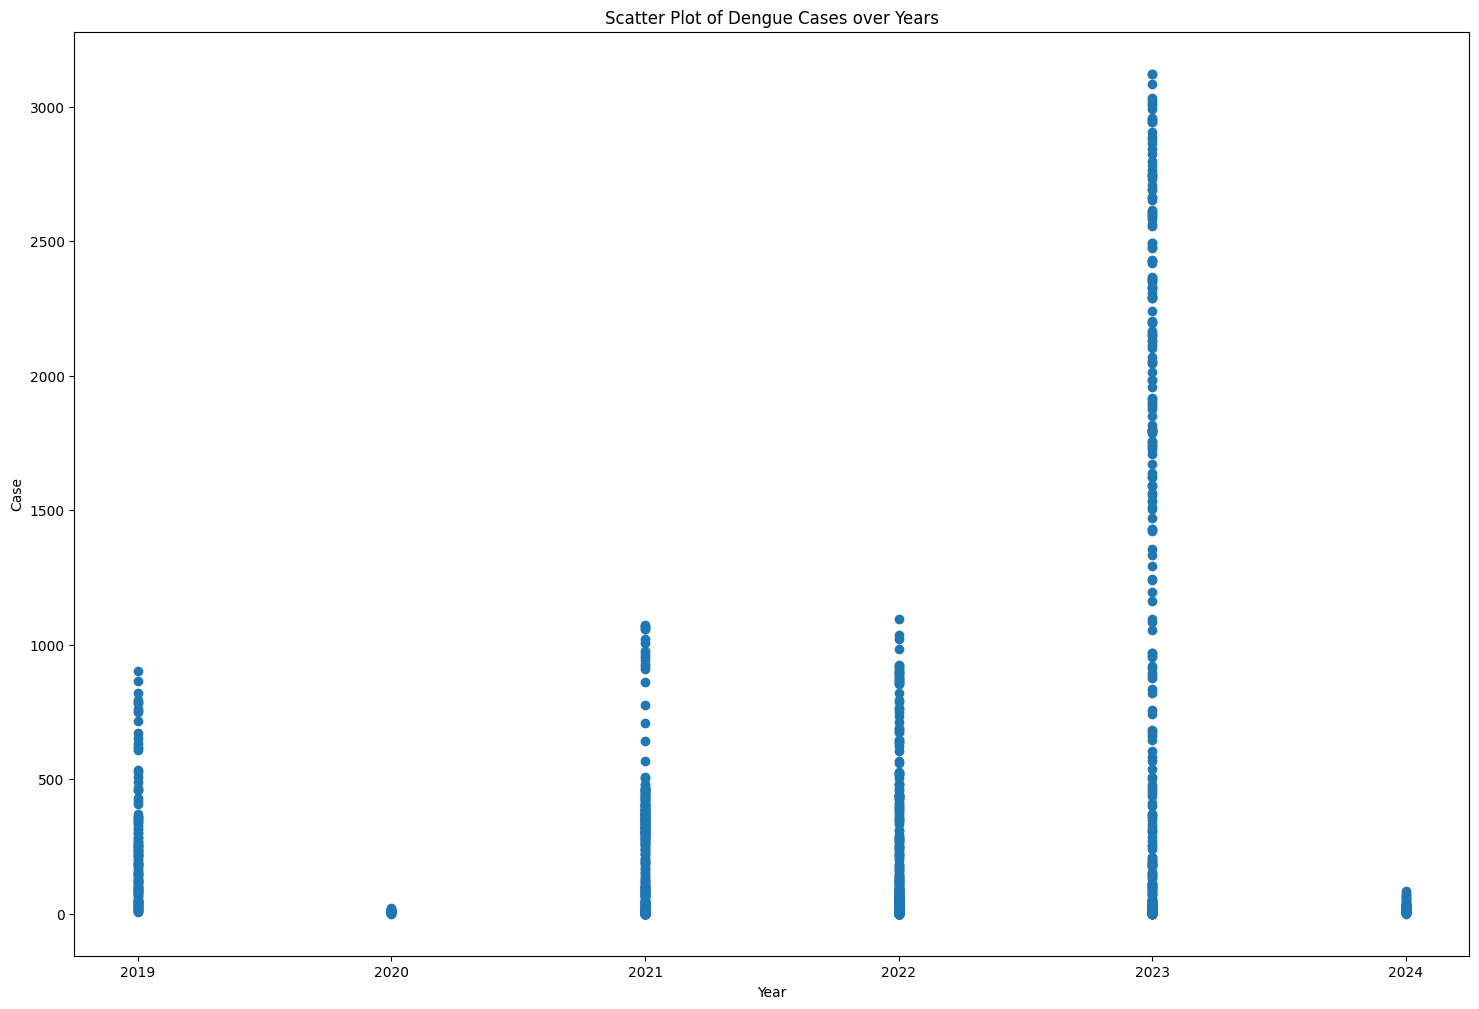

In [8]:
plt.figure(figsize=(18, 12))
plt.scatter(df['Year'], df['Case'])
plt.xlabel('Year')
plt.ylabel('Case')
plt.title('Scatter Plot of Dengue Cases over Years')
plt.show()

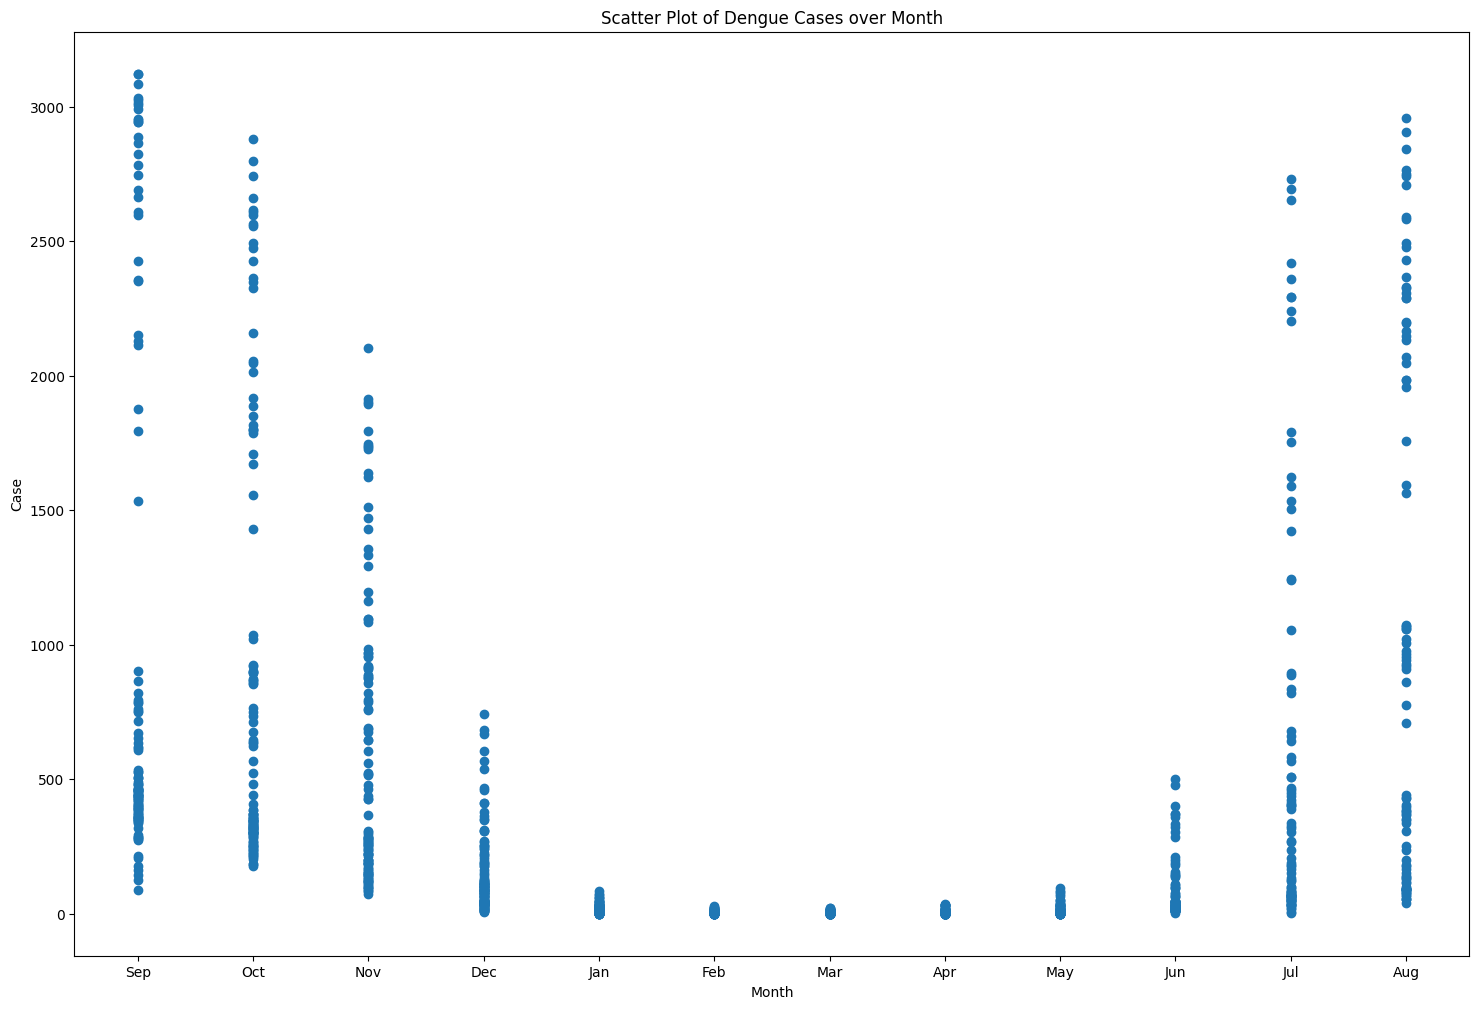

In [9]:
plt.figure(figsize=(18, 12))
plt.scatter(df['Month'], df['Case'])
plt.xlabel('Month')
plt.ylabel('Case')
plt.title('Scatter Plot of Dengue Cases over Month')
plt.show()

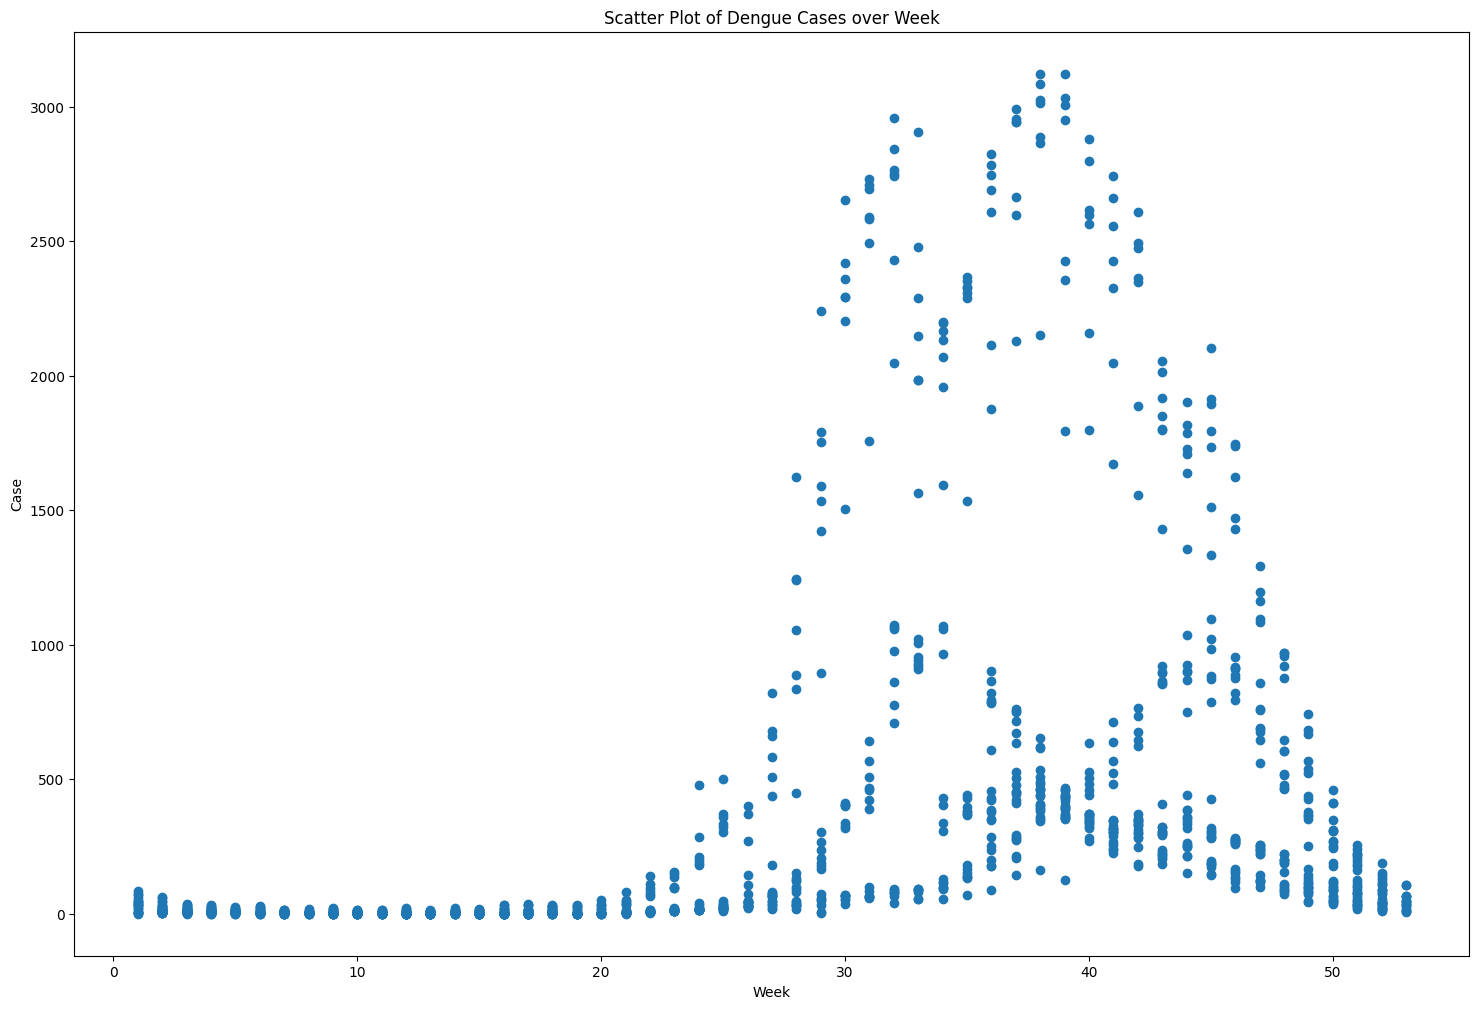

In [10]:
plt.figure(figsize=(18, 12))
plt.scatter(df['Week'], df['Case'])
plt.xlabel('Week')
plt.ylabel('Case')
plt.title('Scatter Plot of Dengue Cases over Week')
plt.show()

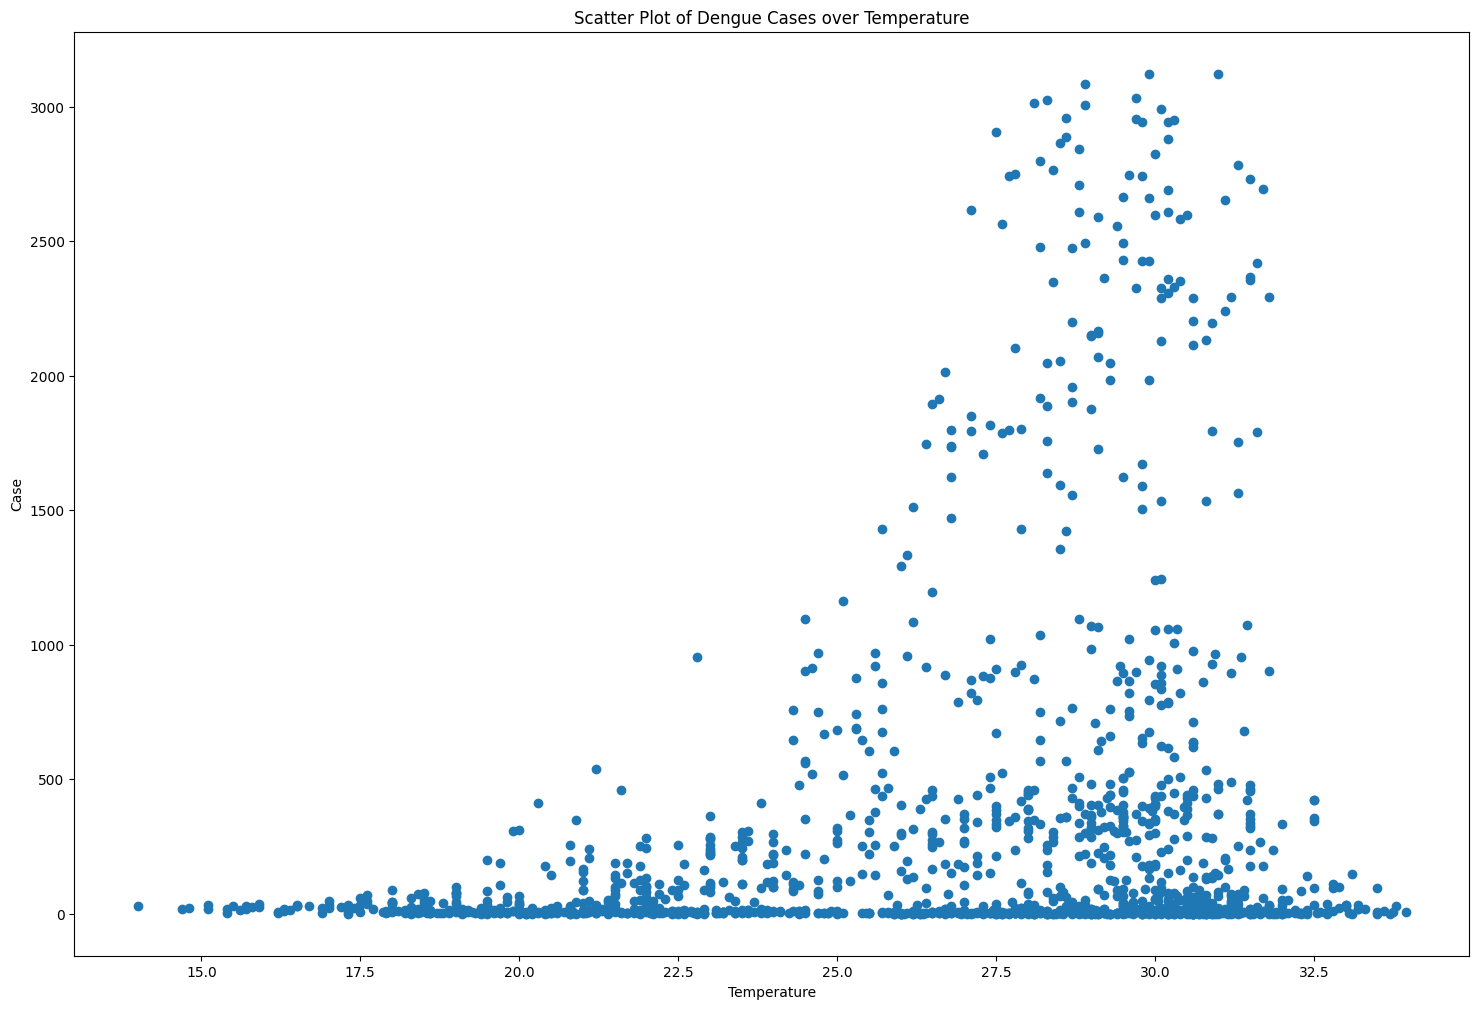

In [11]:
plt.figure(figsize=(18, 12))
plt.scatter(df['Temperature'], df['Case'])
plt.xlabel('Temperature')
plt.ylabel('Case')
plt.title('Scatter Plot of Dengue Cases over Temperature')
plt.show()

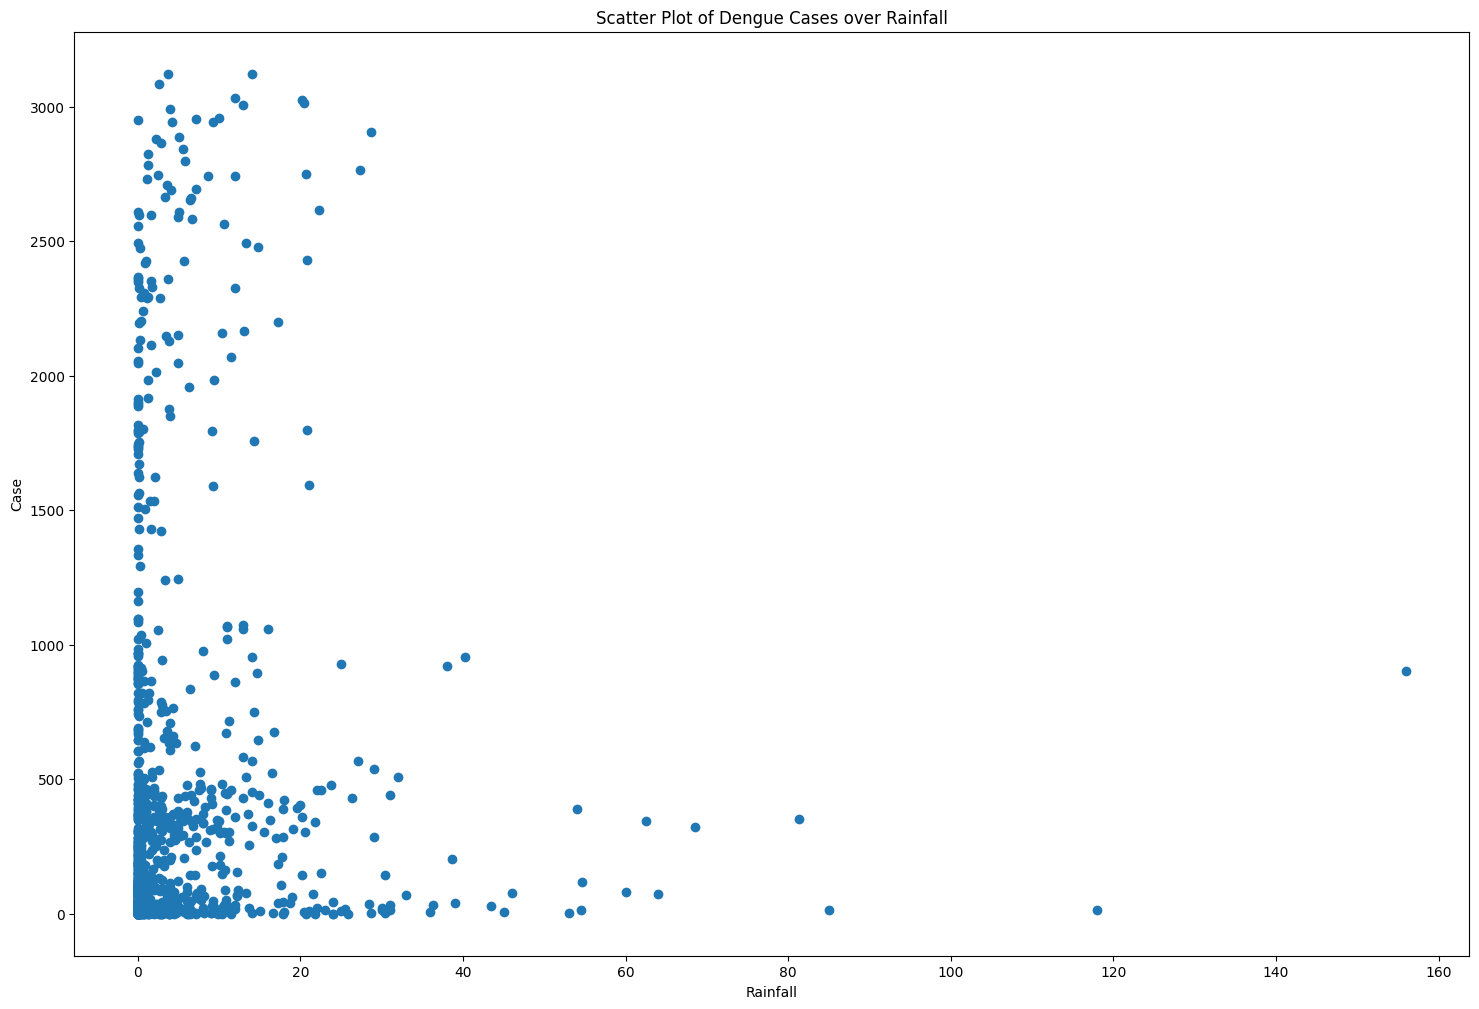

In [12]:
plt.figure(figsize=(18, 12))
plt.scatter(df['Rainfall'], df['Case'])
plt.xlabel('Rainfall')
plt.ylabel('Case')
plt.title('Scatter Plot of Dengue Cases over Rainfall')
plt.show()

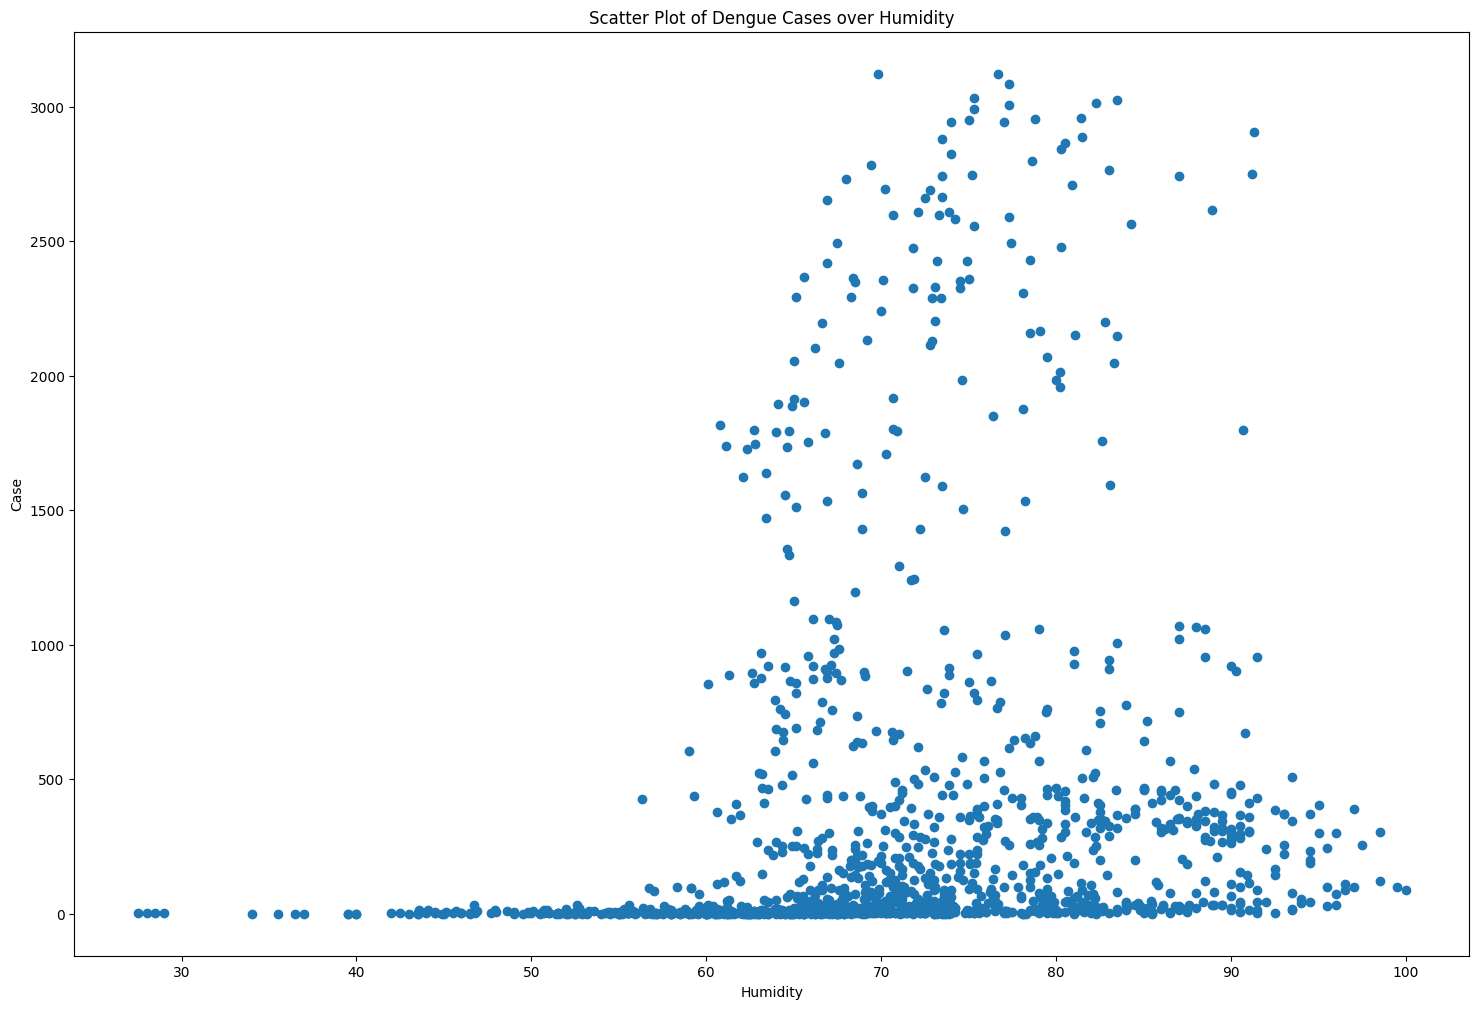

In [13]:
plt.figure(figsize=(18, 12))
plt.scatter(df['Humidity'], df['Case'])
plt.xlabel('Humidity')
plt.ylabel('Case')
plt.title('Scatter Plot of Dengue Cases over Humidity')
plt.show()

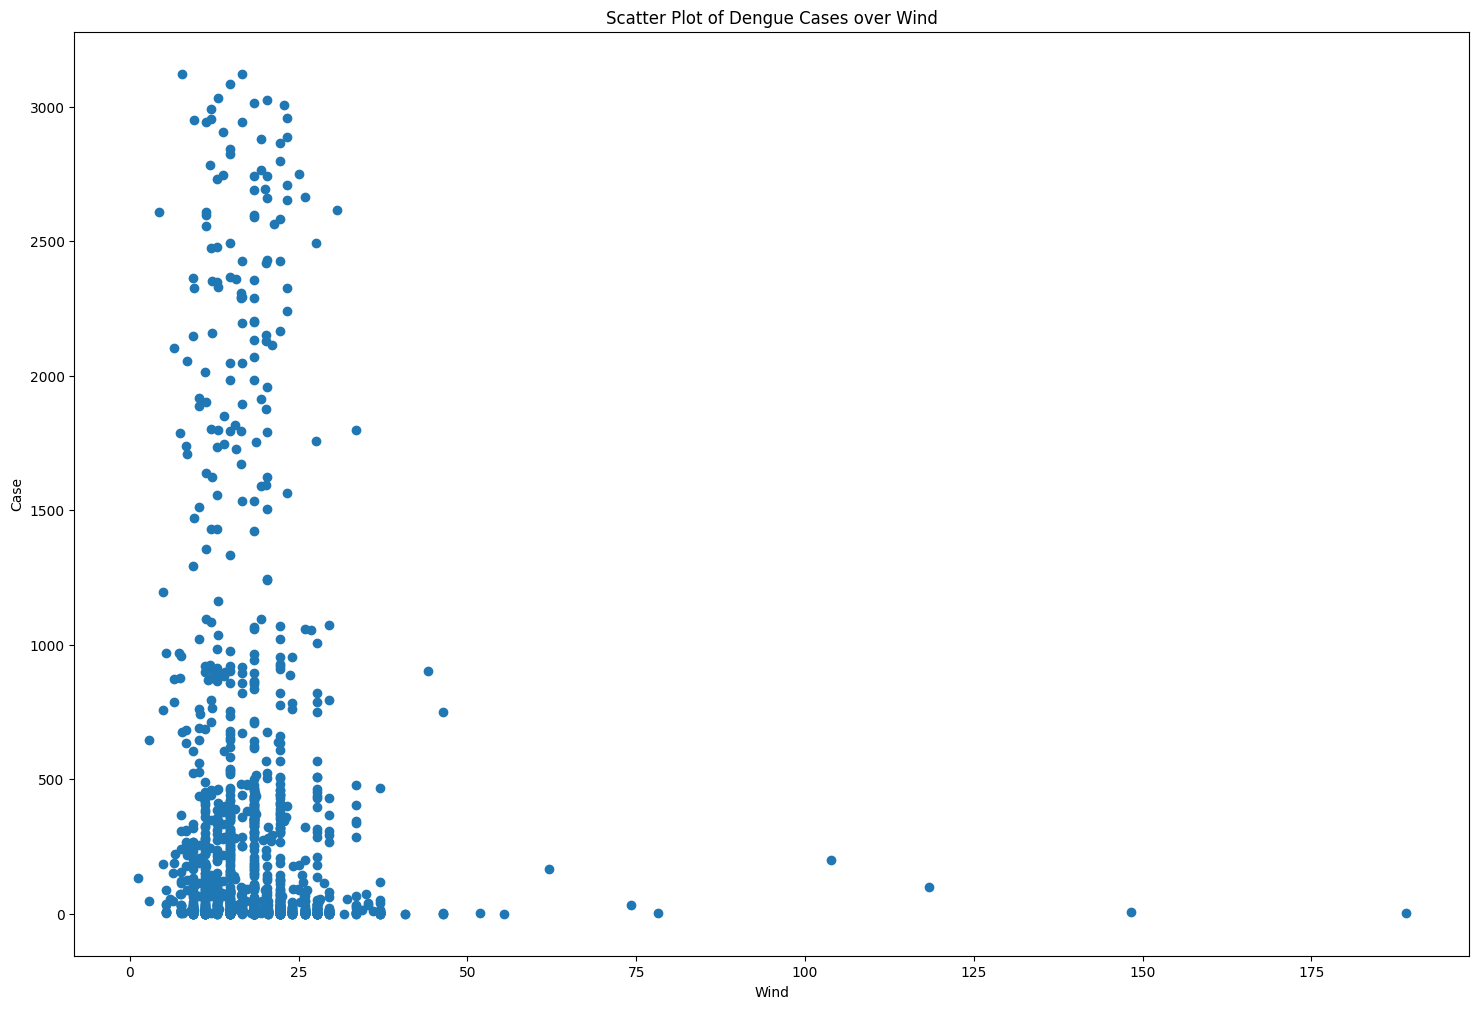

In [14]:
plt.figure(figsize=(18, 12))
plt.scatter(df['Wind'], df['Case'])
plt.xlabel('Wind')
plt.ylabel('Case')
plt.title('Scatter Plot of Dengue Cases over Wind')
plt.show()

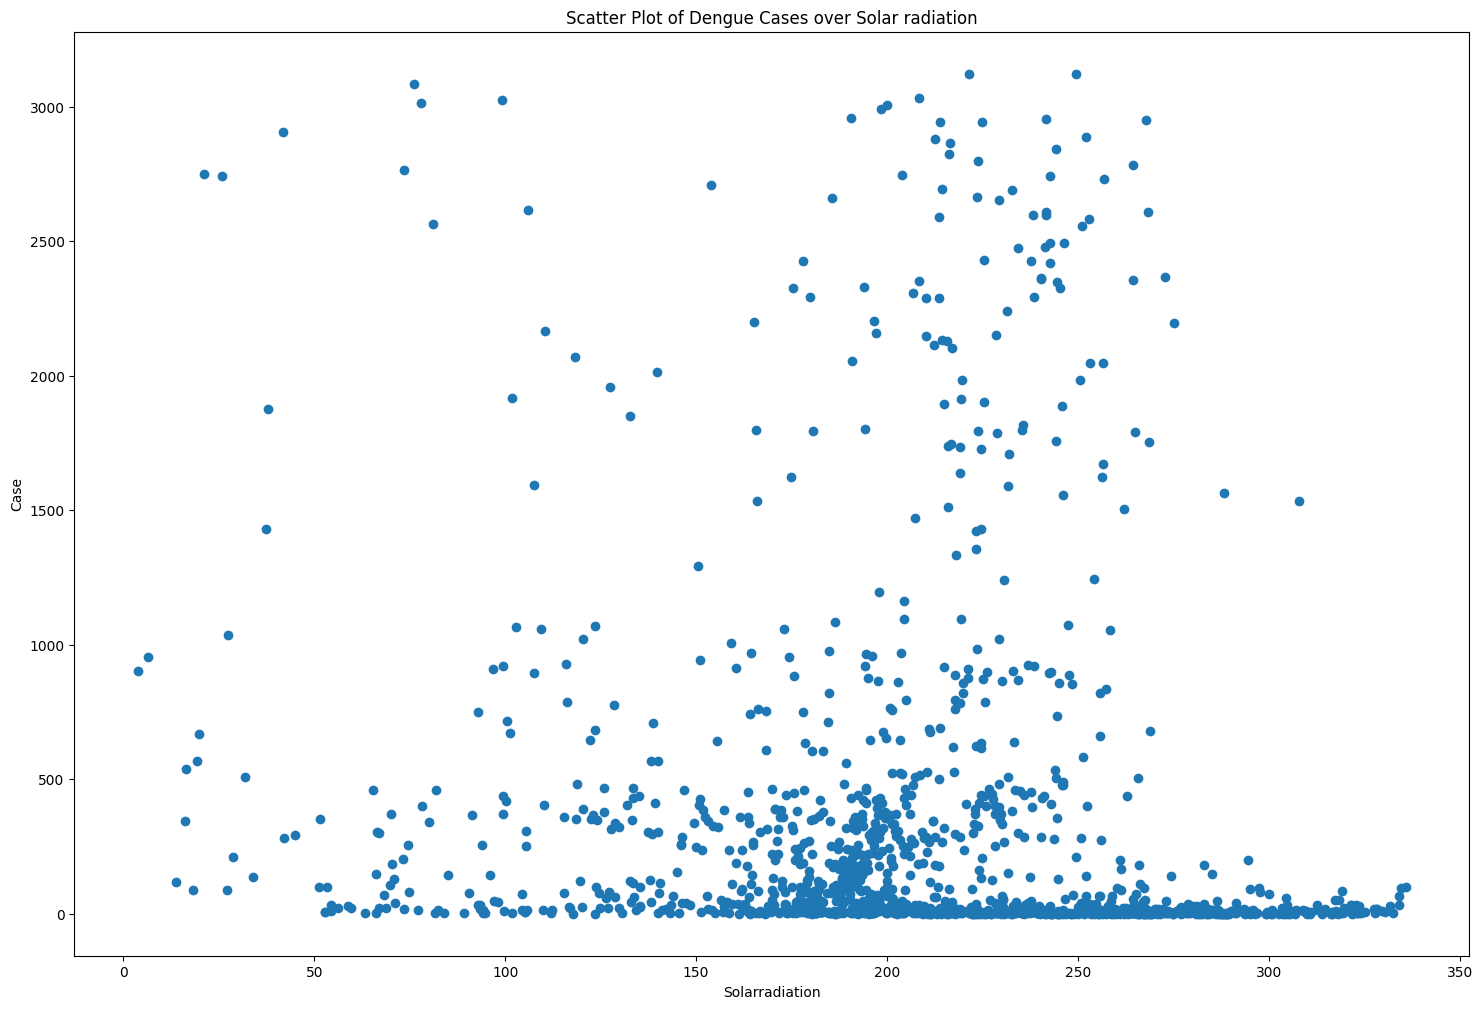

In [15]:
plt.figure(figsize=(18, 12))
plt.scatter(df['Solarradiation'], df['Case'])
plt.xlabel('Solarradiation')
plt.ylabel('Case')
plt.title('Scatter Plot of Dengue Cases over Solar radiation')
plt.show()

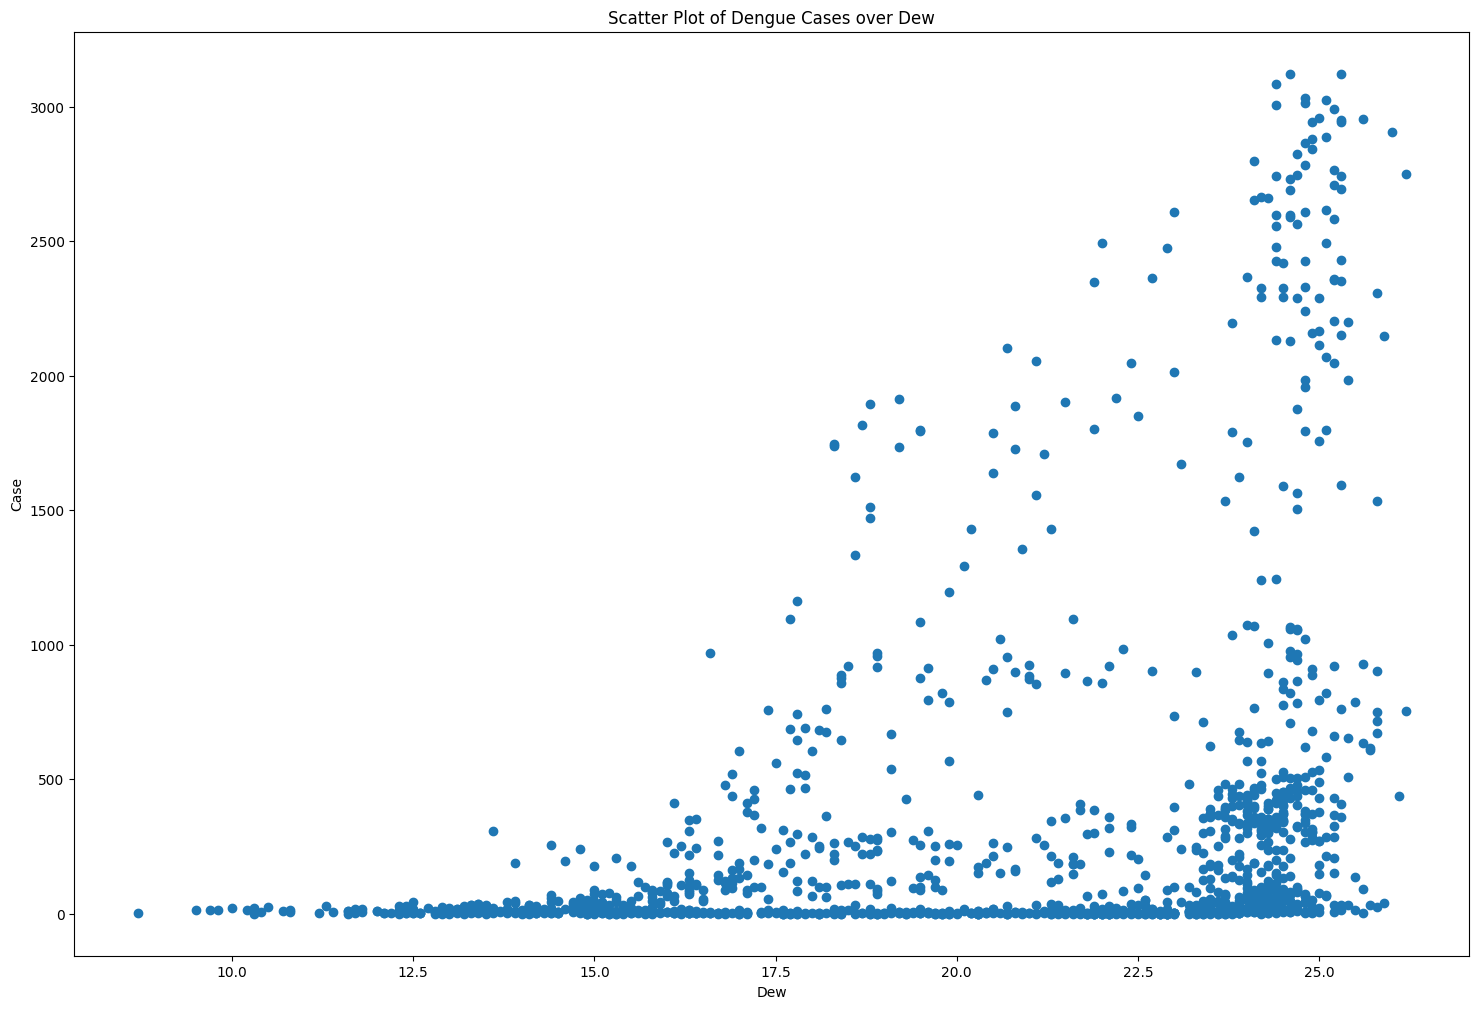

In [16]:
plt.figure(figsize=(18, 12))
plt.scatter(df['Dew'], df['Case'])
plt.xlabel('Dew')
plt.ylabel('Case')
plt.title('Scatter Plot of Dengue Cases over Dew')
plt.show()

In [17]:
# Identify missing values
missing_values = df.isnull().sum()

# Display the missing values for each column
print("Missing Values:")
print(missing_values)

Missing Values:
Year              0
Month             0
Week              0
Case              0
Rainfall          0
Temperature       0
Humidity          0
Wind              0
Solarradiation    0
Dew               0
dtype: int64


In [18]:
# Calculate basic statistics for the cleaned data
statistics_cleaned = df.describe()

# Display the statistics
print("\nBasic Statistics for Cleaned Data:")
print(statistics_cleaned)


Basic Statistics for Cleaned Data:
              Year         Week         Case     Rainfall  Temperature  \
count  1373.000000  1373.000000  1373.000000  1373.000000  1373.000000   
mean   2021.870357    26.479971   350.158048     3.774363    26.677822   
std       1.330546    15.884943   662.096674     9.747389     4.300182   
min    2019.000000     1.000000     0.000000     0.000000    14.000000   
25%    2021.000000    12.000000     5.000000     0.000000    23.400000   
50%    2022.000000    26.000000    43.000000     0.000000    28.000000   
75%    2023.000000    41.000000   353.000000     3.300000    30.100000   
max    2024.000000    53.000000  3123.000000   156.000000    33.950000   

          Humidity         Wind  Solarradiation          Dew  
count  1373.000000  1373.000000     1373.000000  1373.000000  
mean     70.919883    18.344355      209.716897    20.367808  
std      11.285271     9.956078       60.021176     4.112063  
min      27.500000     1.200000        3.8000

In [19]:
categorical_pres = df.groupby('Year')['Case'].sum()

# Display total case per Month
print("\nCategorical View:")
print(categorical_pres)


Categorical View:
Year
2019     31395
2020       199
2021     63549
2022     62172
2023    321191
2024      2261
Name: Case, dtype: int64


In [20]:
categorical_pres = df.groupby('Month')['Case'].sum()

# Display total case per Month
print("\nCategorical View:")
print(categorical_pres)


Categorical View:
Month
Apr       694
Aug     97133
Dec     17751
Feb       594
Jan      2130
Jul     54060
Jun      7576
Mar       477
May      1371
Nov     71320
Oct    107847
Sep    119814
Name: Case, dtype: int64


In [21]:
categorical_pres = df.groupby('Week')['Case'].sum()

# Display total case per Month
print("\nCategorical View:")
print(categorical_pres)


Categorical View:
Week
1       664
2       590
3       376
4       308
5       247
6       201
7       147
8       104
9       121
10       99
11      103
12      110
13       98
14      127
15      103
16      173
17      219
18      254
19      154
20      216
21      359
22      689
23      921
24     1824
25     2561
26     1902
27     4608
28     8368
29    13056
30    18736
31    21520
32    25576
33    22584
34    19600
35    19252
36    27391
37    28904
38    29523
39    26939
40    25572
41    24080
42    24032
43    22224
44    21842
45    21649
46    18195
47    14348
48    11225
49     7788
50     5129
51     3244
52     1963
53      749
Name: Case, dtype: int64


# **Feature Engineering**

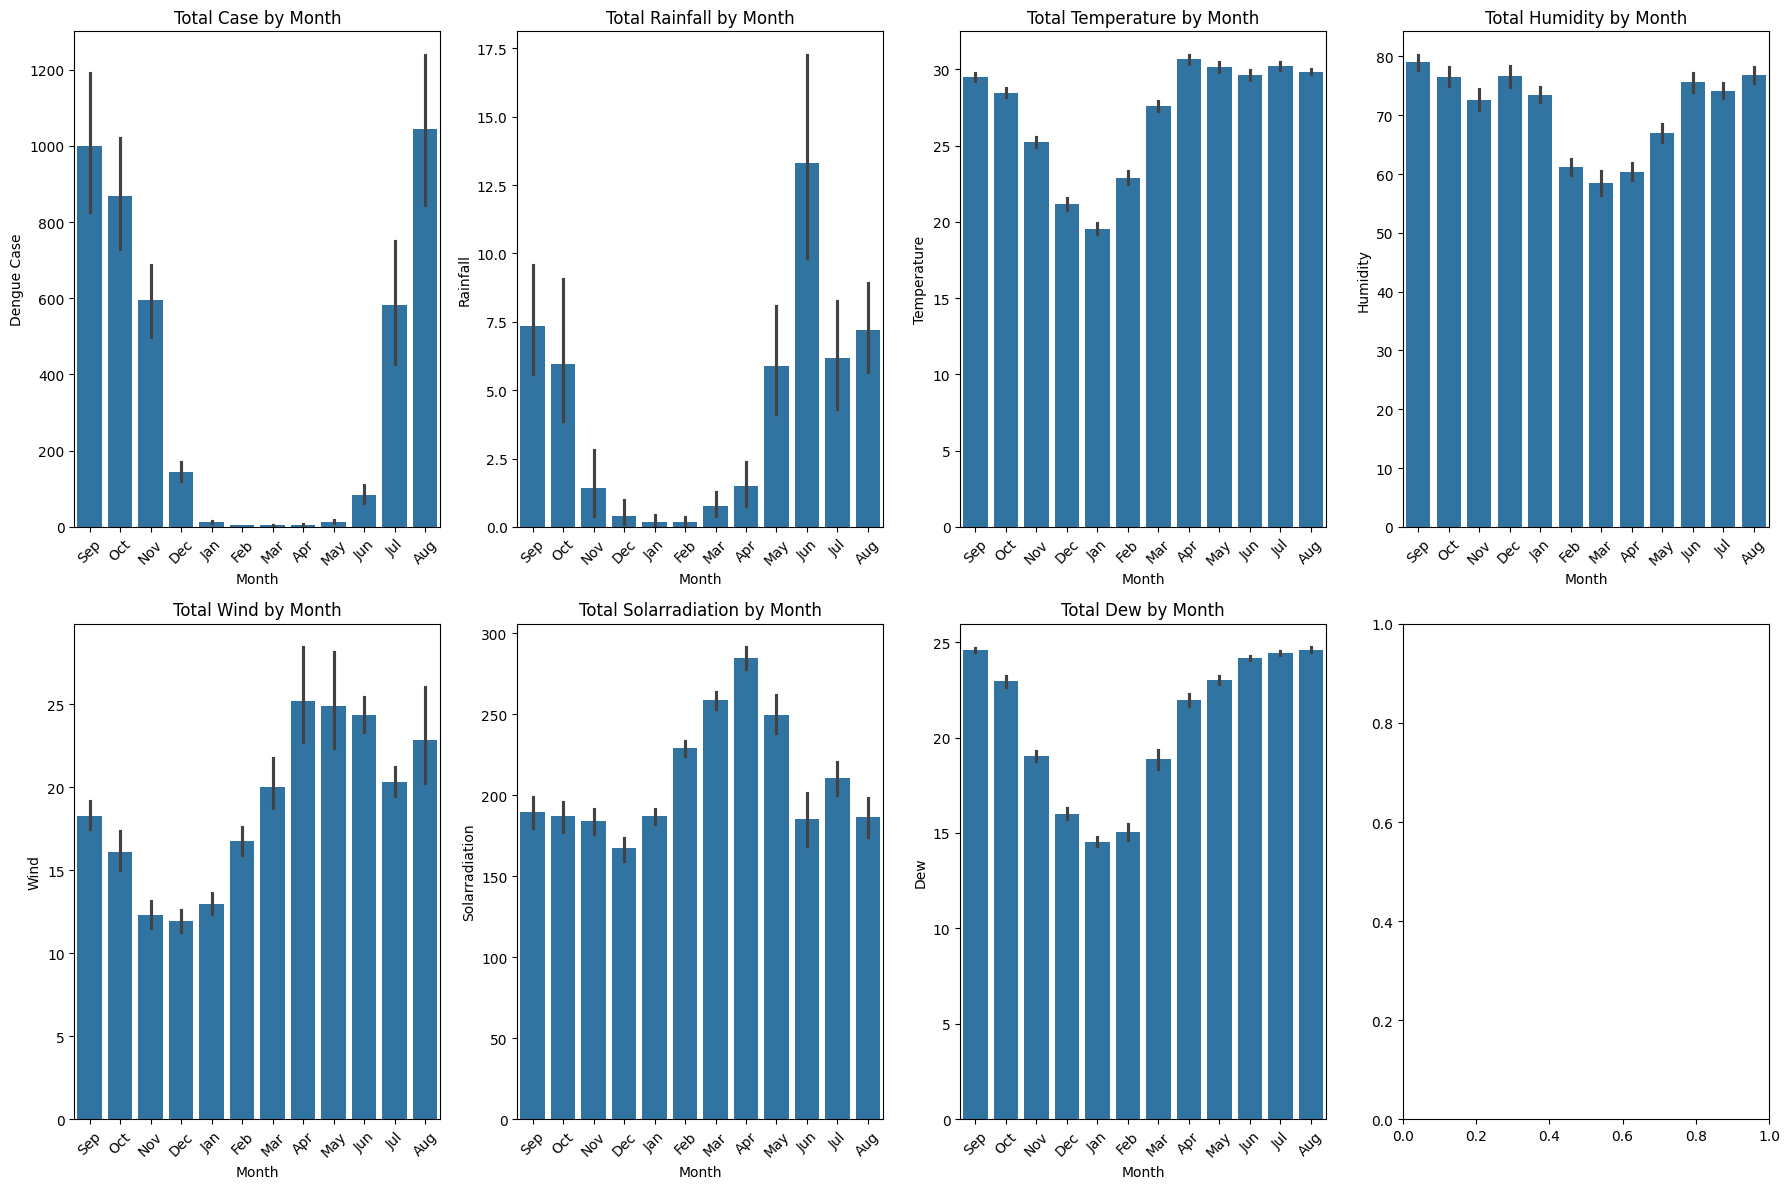

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the grid layout
fig, axes = plt.subplots(2, 4, figsize=(18, 12))

# Visualize the distribution of Dengue case by Month
sns.barplot(x='Month', y='Case', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Total Case by Month')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Dengue Case')
axes[0, 0].tick_params(axis='x', rotation=45)

# Visualize the distribution of Rainfall by Month
sns.barplot(x='Month', y='Rainfall', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Total Rainfall by Month')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Rainfall')
axes[0, 1].tick_params(axis='x', rotation=45)

# Visualize the distribution of Temperature by Month
sns.barplot(x='Month', y='Temperature', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Total Temperature by Month')
axes[0, 2].set_xlabel('Month')
axes[0, 2].set_ylabel('Temperature')
axes[0, 2].tick_params(axis='x', rotation=45)

# Visualize the distribution of Humidity by Month
sns.barplot(x='Month', y='Humidity', data=df, ax=axes[0, 3])
axes[0, 3].set_title('Total Humidity by Month')
axes[0, 3].set_xlabel('Month')
axes[0, 3].set_ylabel('Humidity')
axes[0, 3].tick_params(axis='x', rotation=45)

# Visualize the distribution of Wind by Month
sns.barplot(x='Month', y='Wind', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Total Wind by Month')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Wind')
axes[1, 0].tick_params(axis='x', rotation=45)

# Visualize the distribution of Solarradiation by Month
sns.barplot(x='Month', y='Solarradiation', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Total Solarradiation by Month')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Solarradiation')
axes[1, 1].tick_params(axis='x', rotation=45)

# Visualize the distribution of Dew by Month
sns.barplot(x='Month', y='Dew', data=df, ax=axes[1, 2])
axes[1, 2].set_title('Total Dew by Month')
axes[1, 2].set_xlabel('Month')
axes[1, 2].set_ylabel('Dew')
axes[1, 2].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


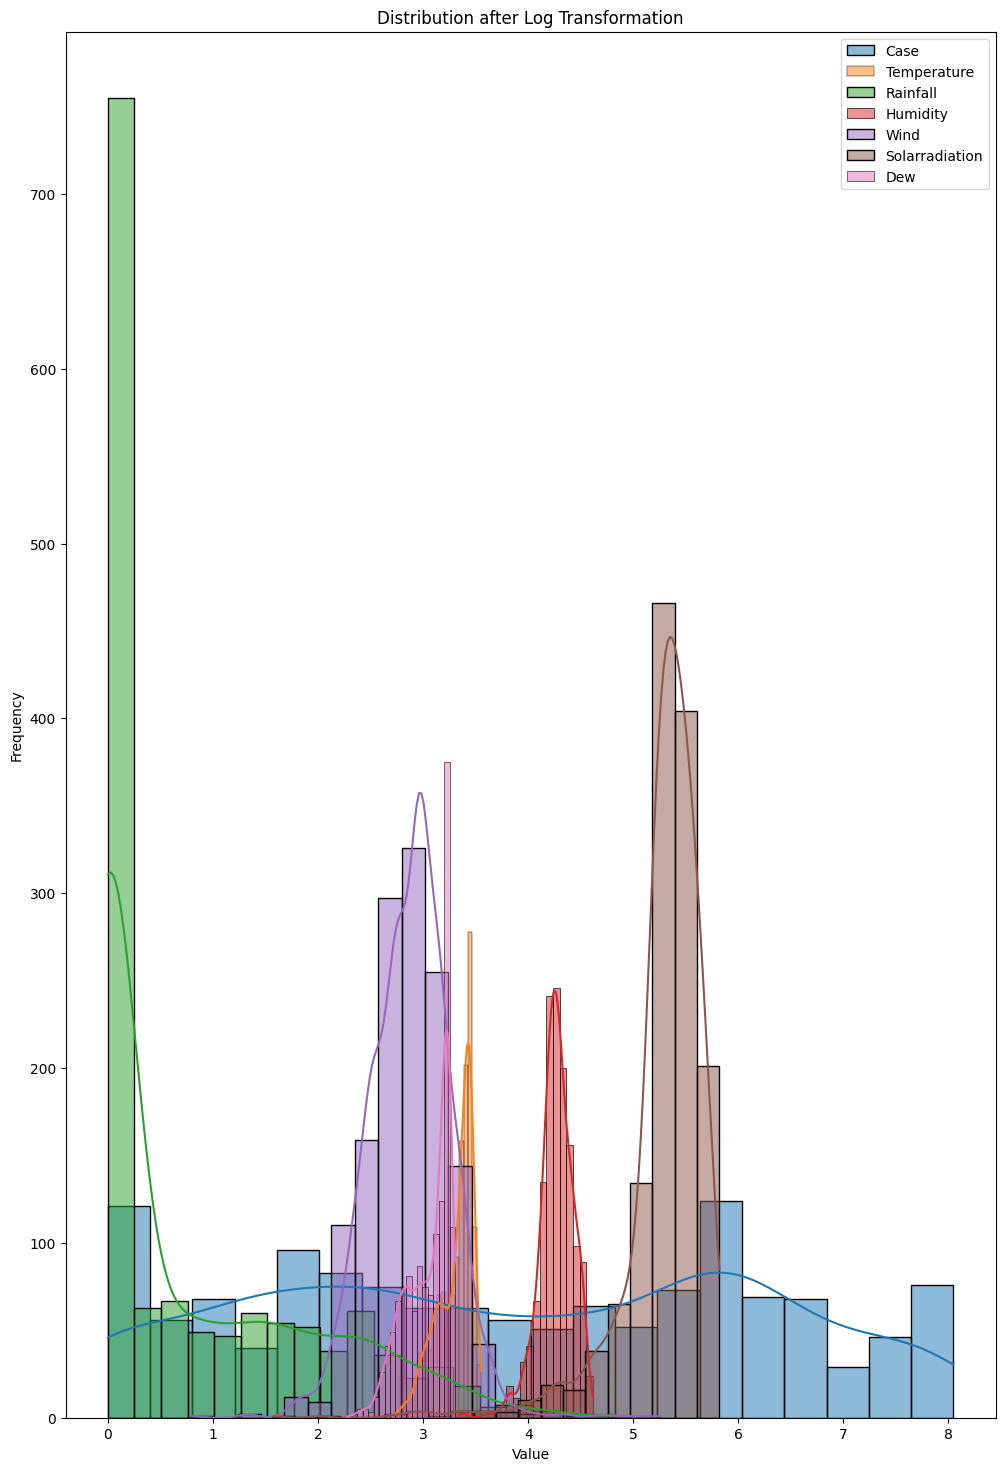

In [23]:
# Apply log transformation to numerical columns (Temperature, Rainfall, Humidity, Wind)
numeric_cols = ['Case','Temperature', 'Rainfall', 'Humidity', 'Wind', 'Solarradiation', 'Dew']
df[numeric_cols] = df[numeric_cols].apply(lambda x: np.log(x + 1))  # Adding 1 to avoid log(0)

# Visualize the distribution after log transformation
plt.figure(figsize=(12, 18))
for column in numeric_cols:
    sns.histplot(df[column], bins=20, kde=True, alpha=0.5, label=column)
plt.title('Distribution after Log Transformation')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Correlation between Case and other attributes:
Year             -0.024564
Month             0.333409
Week              0.655161
Humidity          0.467820
Dew               0.397439
Rainfall          0.294963
Temperature       0.197508
Wind             -0.171953
Solarradiation   -0.284154
Name: Case, dtype: float64


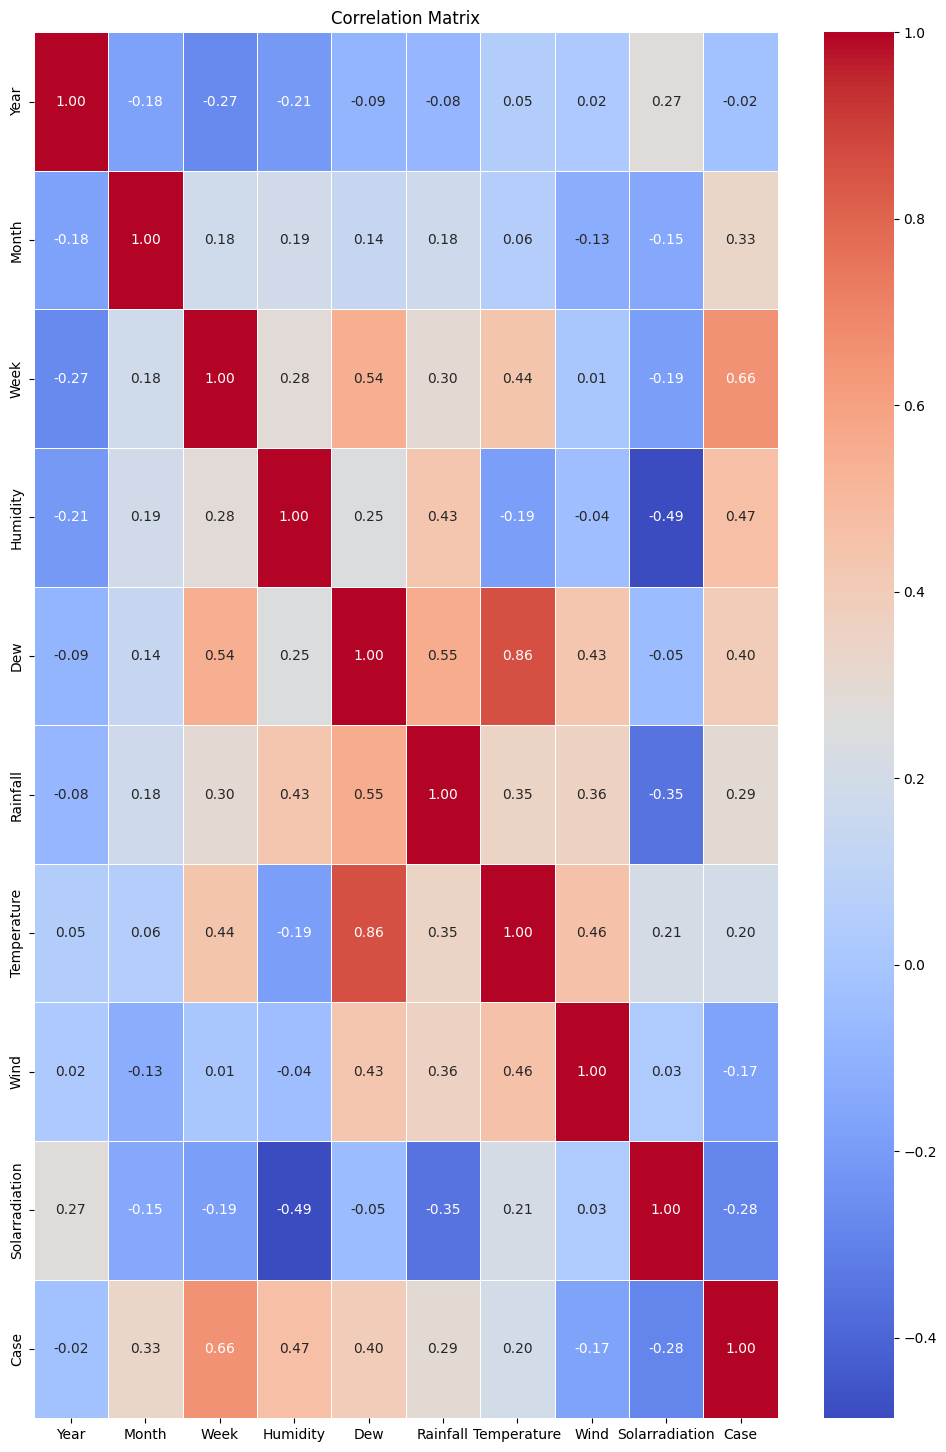

In [24]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode the categorical column
df['Month'] = label_encoder.fit_transform(df['Month'])
df['Month'] = np.log(df['Month'] + 1)
df['Year'] = np.log(df['Year'] + 1)
df['Week'] = np.log(df['Week'] + 1)

# Compute correlation matrix
correlation_matrix = df[['Year', 'Month', 'Week', 'Humidity', 'Dew', 'Rainfall', 'Temperature', 'Wind', 'Solarradiation', 'Case']].corr()

# Extract correlation between PBC and other attributes
correlation_with_Case = correlation_matrix.loc['Case', ['Year', 'Month', 'Week', 'Humidity', 'Dew', 'Rainfall', 'Temperature', 'Wind', 'Solarradiation']]

print("Correlation between Case and other attributes:")
print(correlation_with_Case)
# Plot heatmap
plt.figure(figsize=(12, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

<Axes: >

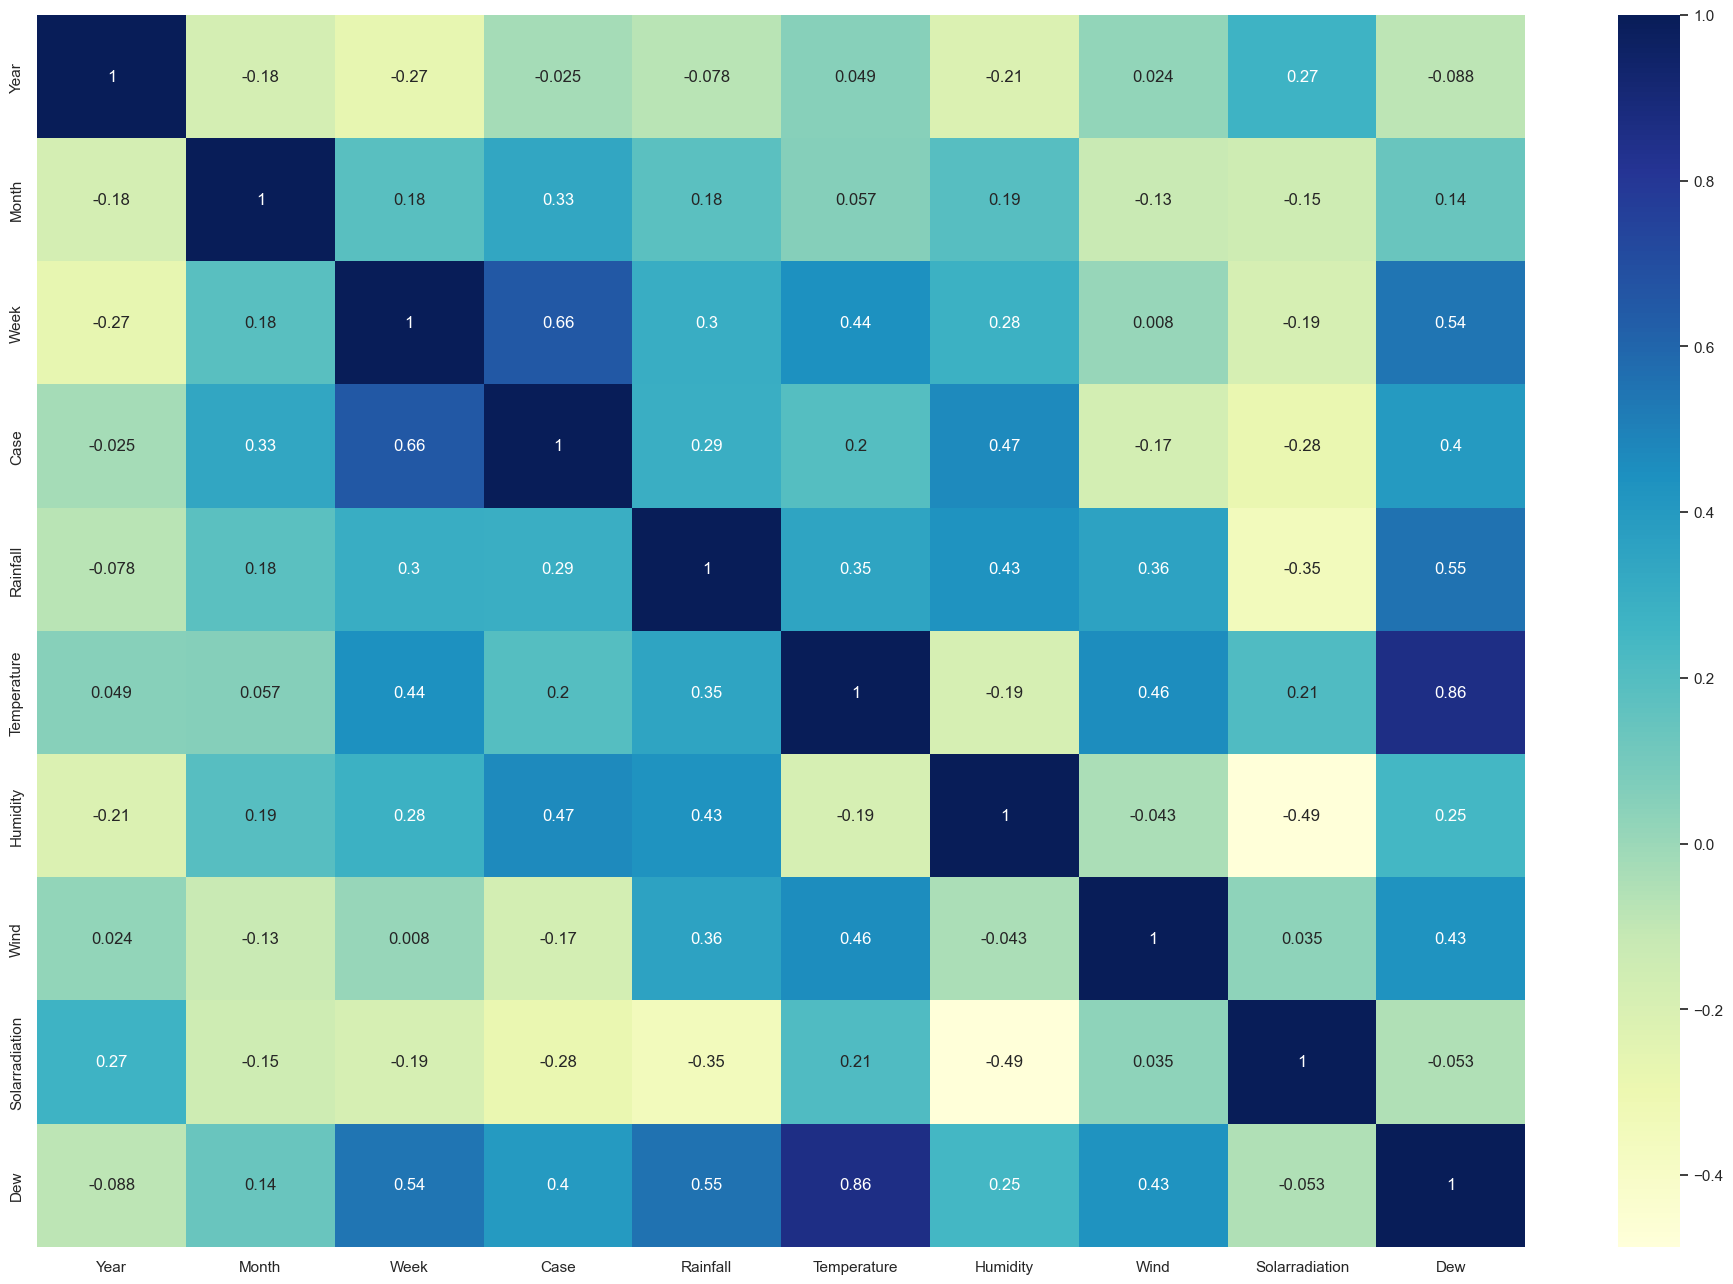

In [25]:
#Correlation plot
sns.set(rc = {'figure.figsize':(24, 16)})
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

<Axes: >

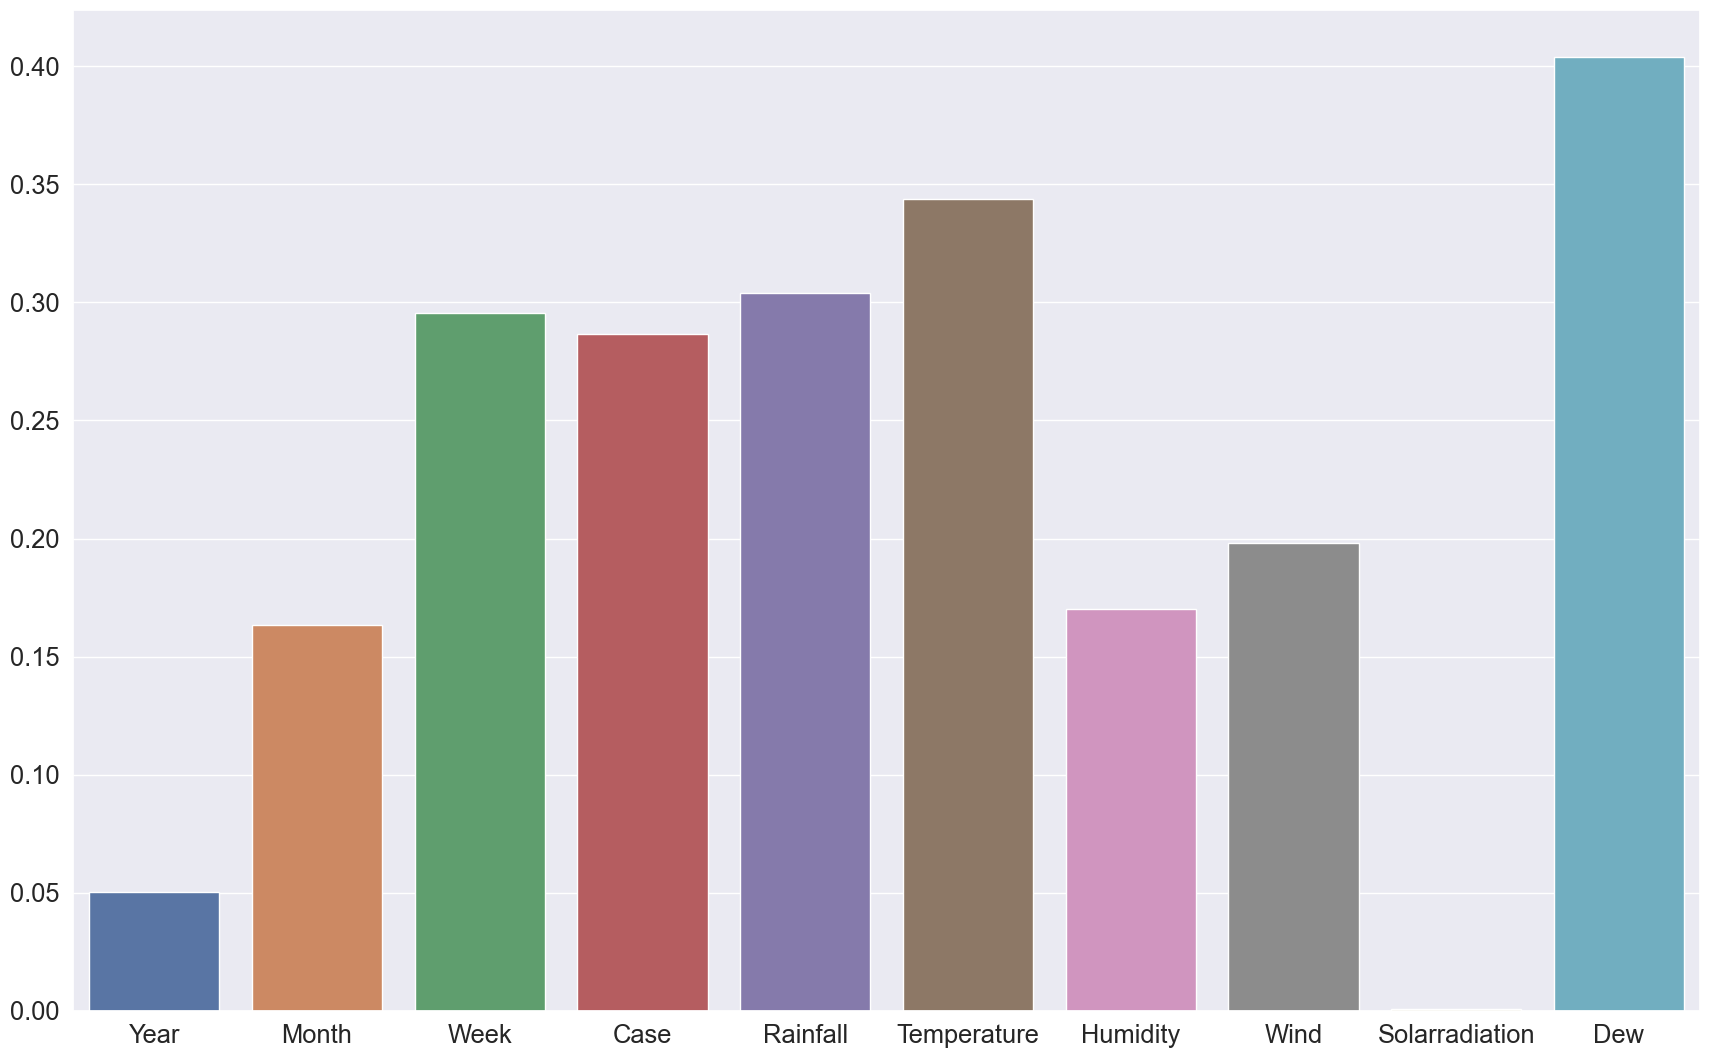

In [26]:
sns.set(rc = {'figure.figsize':(21, 13)})
sns.set(font_scale = 1.67)
sns.barplot(df.corr(), errorbar=None, orient="v")

In [27]:
# Sort attributes
df = df[['Year', 'Month', 'Week', 'Rainfall', 'Temperature', 'Humidity', 'Wind', 'Solarradiation', 'Dew', 'Case']]

In [28]:
# Splitting features and target variable
X = df.drop(columns=['Case'])
y = df['Case']

In [29]:
# Data Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# **Model**

In [31]:
# Initialize models
models = {
    'RandomForest': RandomForestRegressor(),
    'Lasso': Lasso(),
    'LinearRegression': LinearRegression(),
    'SVR': SVR(),
    'BidirectionalLSTM': Sequential([Bidirectional(LSTM(50, activation='relu'), input_shape=(X_train.shape[1], 1)),
                                     Dense(1)]),
    'LSTM': Sequential([LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)), Dense(1)]),
    'SimpleRNN': Sequential([SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], 1)), Dense(1)])
}

# Hyperparameter Tuning
param_grid = {
    'RandomForest': {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]},
    'SVR': {'kernel': ['linear', 'rbf'], 'C': [1, 10, 100], 'gamma': ['scale', 'auto']}
}

for name, model in models.items():
    if name in param_grid:
        grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        model = grid_search.best_estimator_
        models[name] = model

c:\Users\kazbe\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\kazbe\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
# Training and Evaluation
results = {}
predictions = {}
for name, model in models.items():
    if 'LSTM' in name or 'RNN' in name:
        # Reshape data for LSTM models
        X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
        X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
        model.compile(optimizer='adam', loss='mse')
        model.fit(X_train_reshaped, y_train, epochs=500, batch_size=32, verbose=0)
        y_pred = model.predict(X_test_reshaped)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}
    predictions[name] = {'Actual': y_test, 'Predicted': y_pred}

9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


# **Export Output**

In [33]:
# Save the trained models to pickle files
for name, model in models.items():
    with open(f'{name}_model.pkl', 'wb') as f:
        pickle.dump(model, f)

# Save the scaler models to pickle files
for name, model in models.items():
    with open(f'{name}_scaler.pkl', 'wb') as f:
        pickle.dump(scaler, f)

# Save the label encoder models to pickle files
for name, model in models.items():
    with open(f'{name}_label_encoder.pkl', 'wb') as f:
        pickle.dump(label_encoder, f)

In [34]:
# Save predictions to CSV with inverse log transformation
for name, preds in predictions.items():
    actual_values = np.exp(np.array(preds['Actual']).flatten()) - 1  # Flattening and inverse log transformation for actual values
    predicted_values = np.exp(np.array(preds['Predicted']).flatten()) - 1  # Flattening and inverse log transformation for predicted values
    preds_df = pd.DataFrame({'Actual': actual_values, 'Predicted': predicted_values})
    preds_df.to_csv(f'{name}_predictions.csv', index=False)

# **Evaluation**

In [35]:
# Print results
for name, result in results.items():
    print(f"{name}: MSE = {result['MSE']}, R2 = {result['R2']}")

RandomForest: MSE = 0.262604027541709, R2 = 0.9558177055960123
Lasso: MSE = 4.5409995689686875, R2 = 0.2359912308934794
LinearRegression: MSE = 2.292309542548361, R2 = 0.6143261928537784
SVR: MSE = 0.3792337590182055, R2 = 0.9361951233356006
BidirectionalLSTM: MSE = 0.42645710662110475, R2 = 0.9282499449388155
LSTM: MSE = 0.3109830867184689, R2 = 0.9476780823939421
SimpleRNN: MSE = 0.442328268742336, R2 = 0.9255796722703498


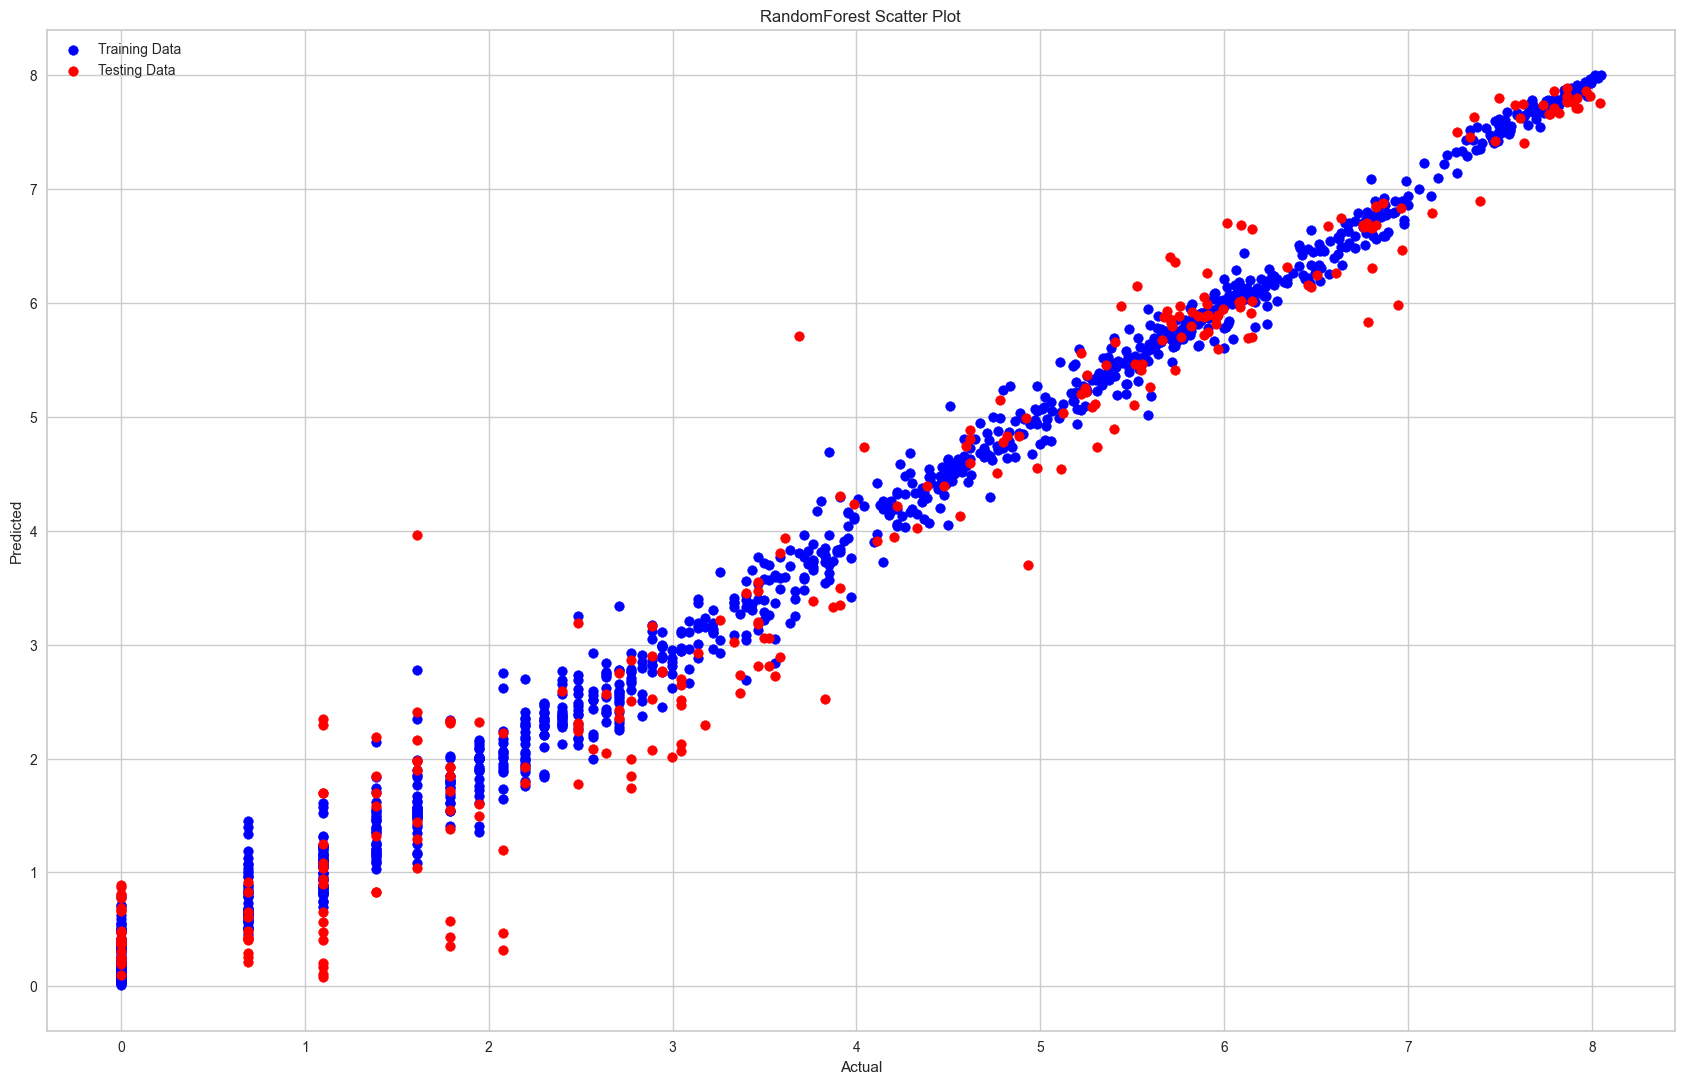

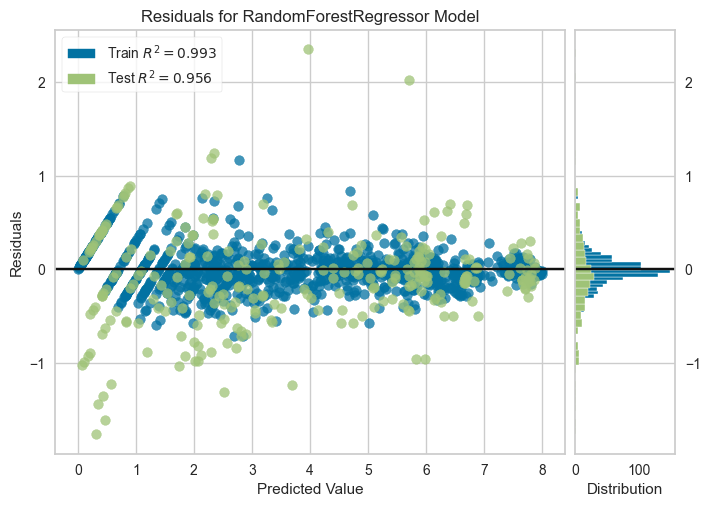

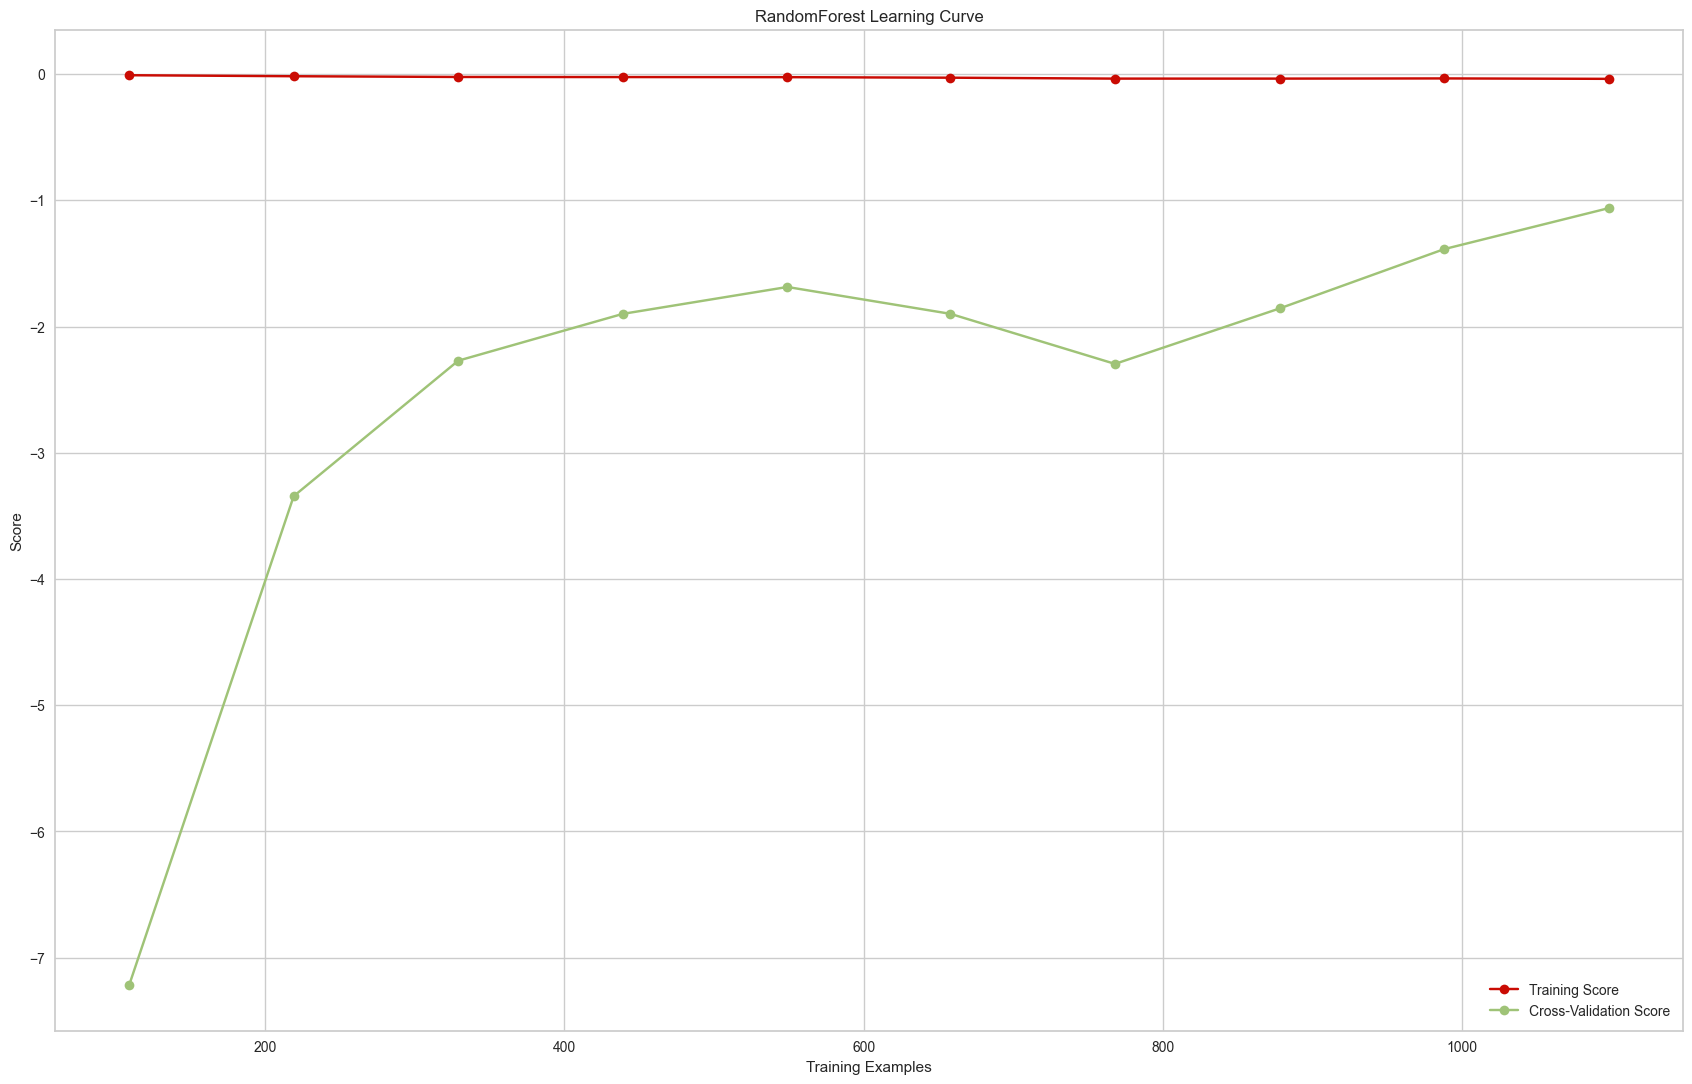

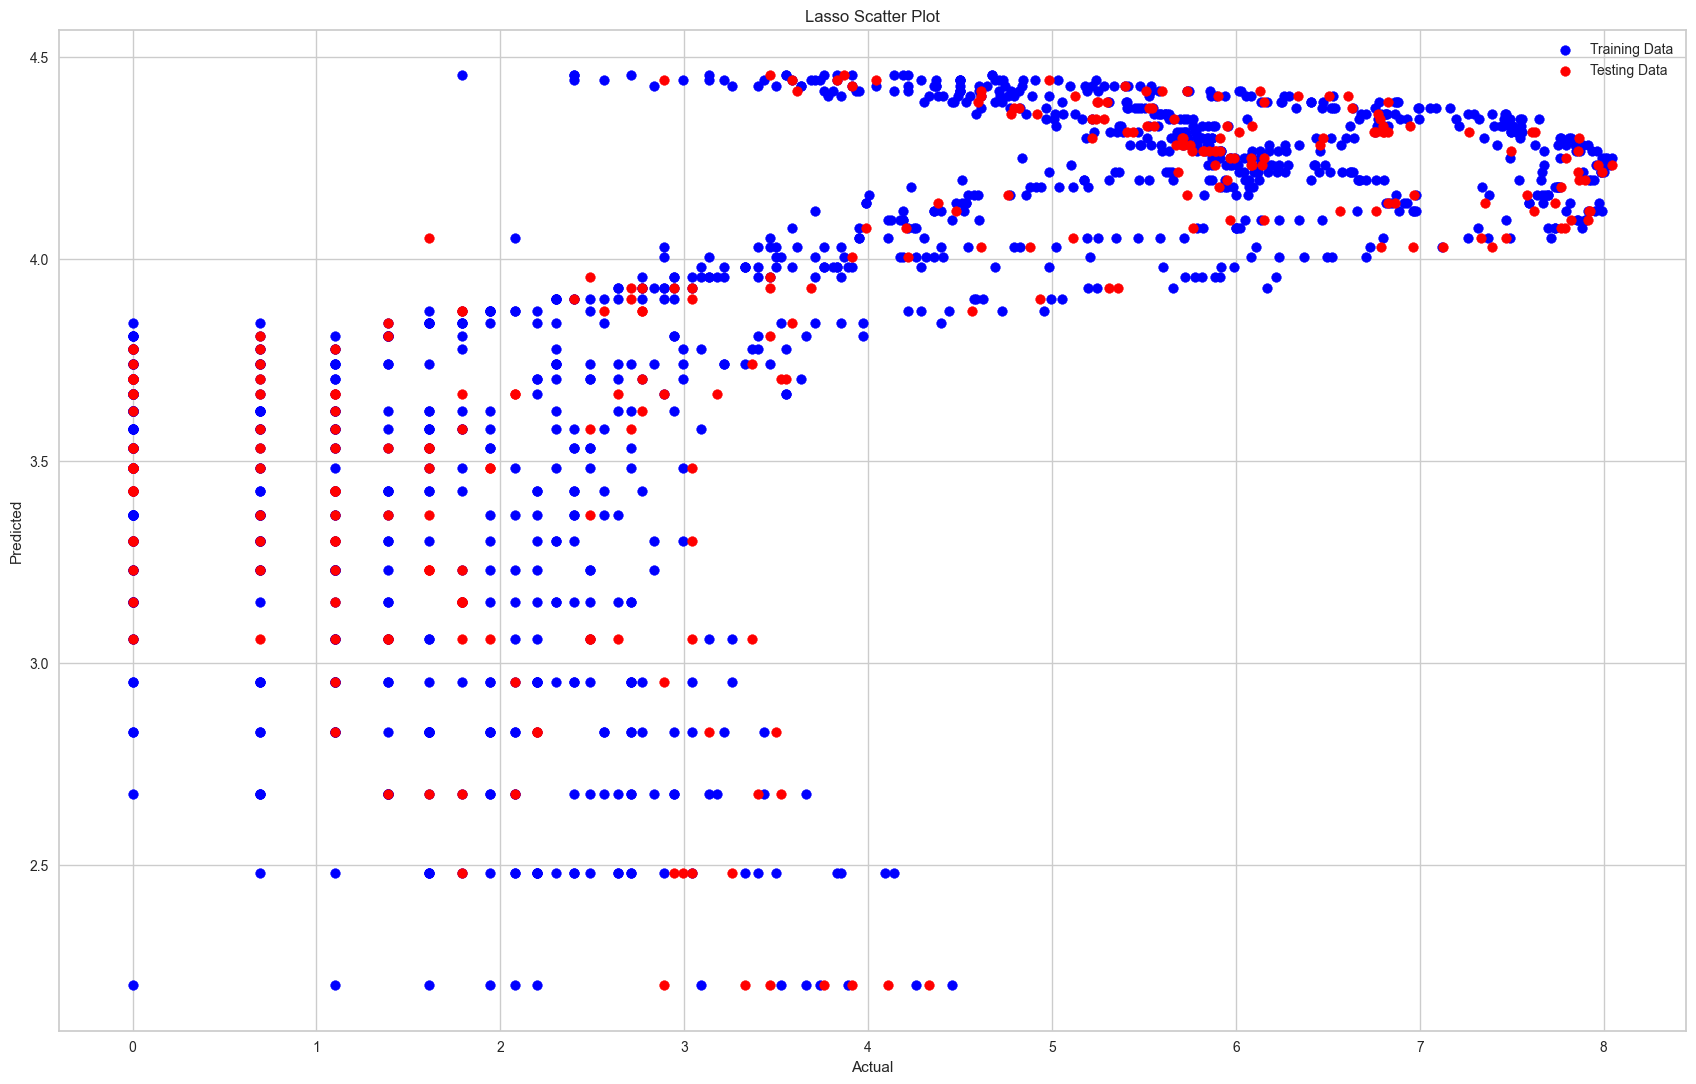

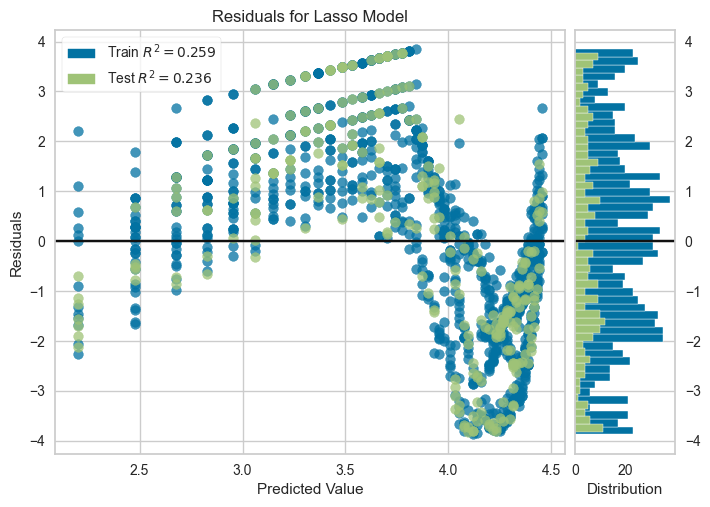

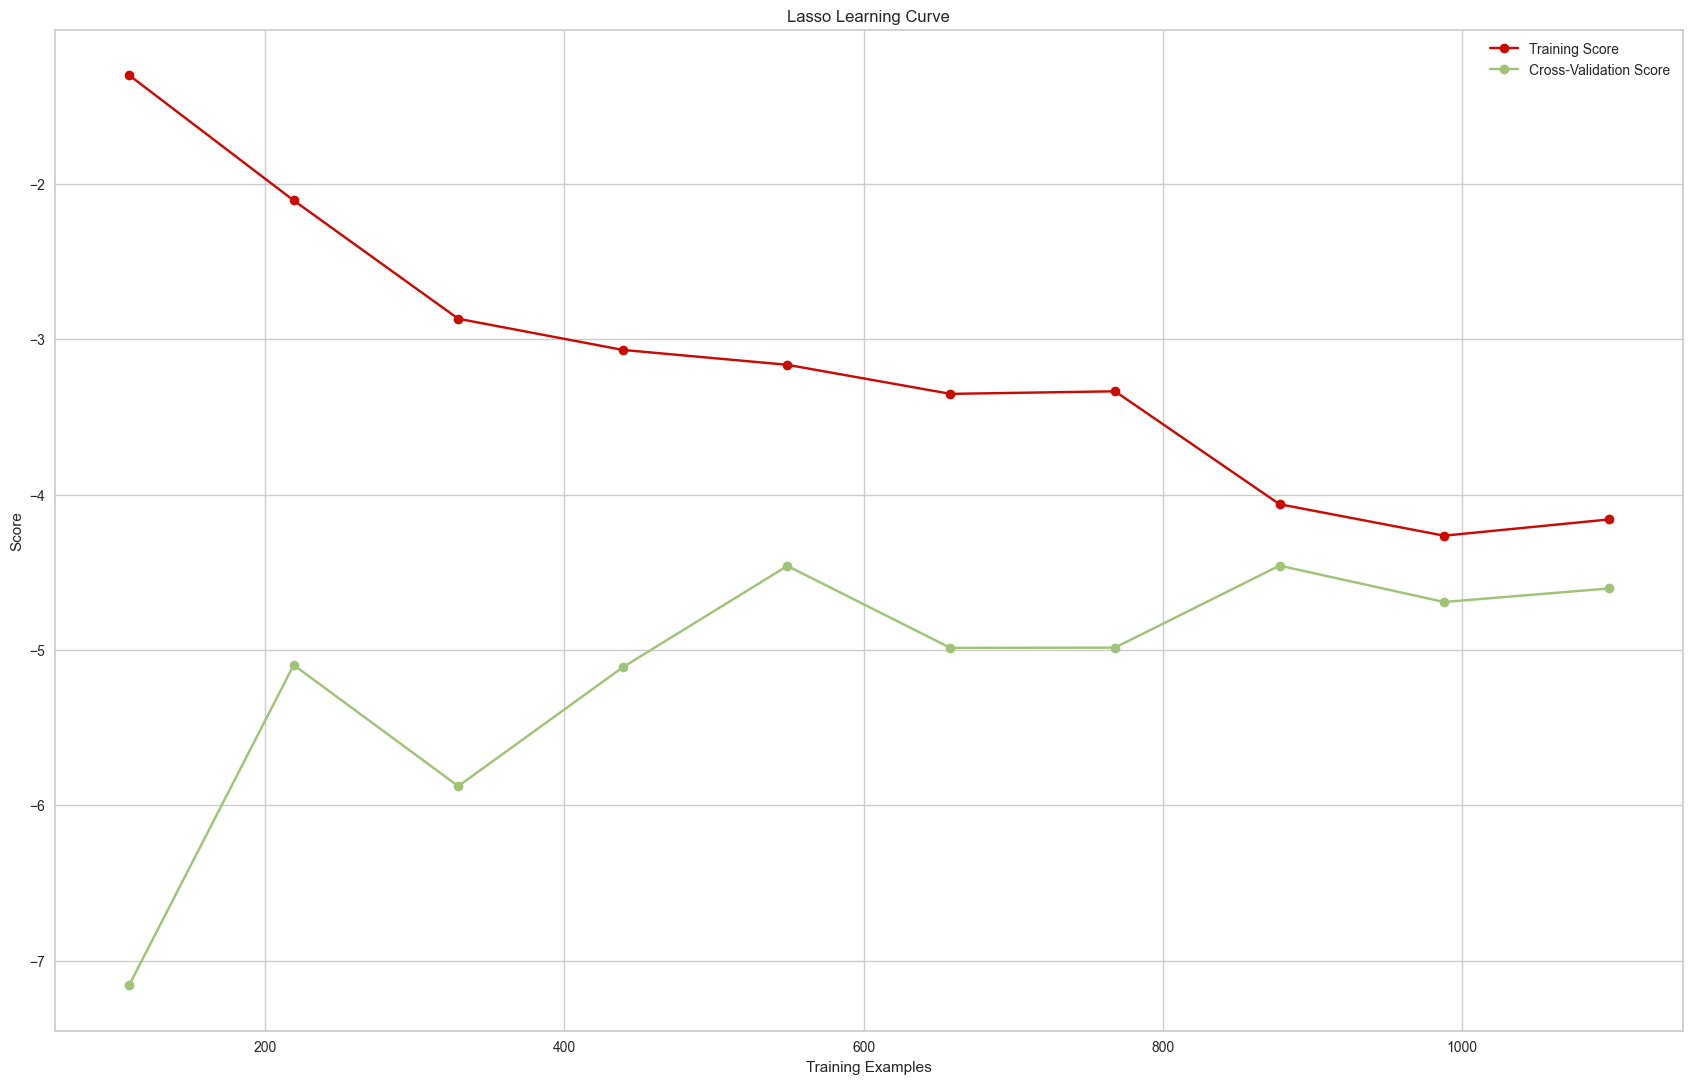

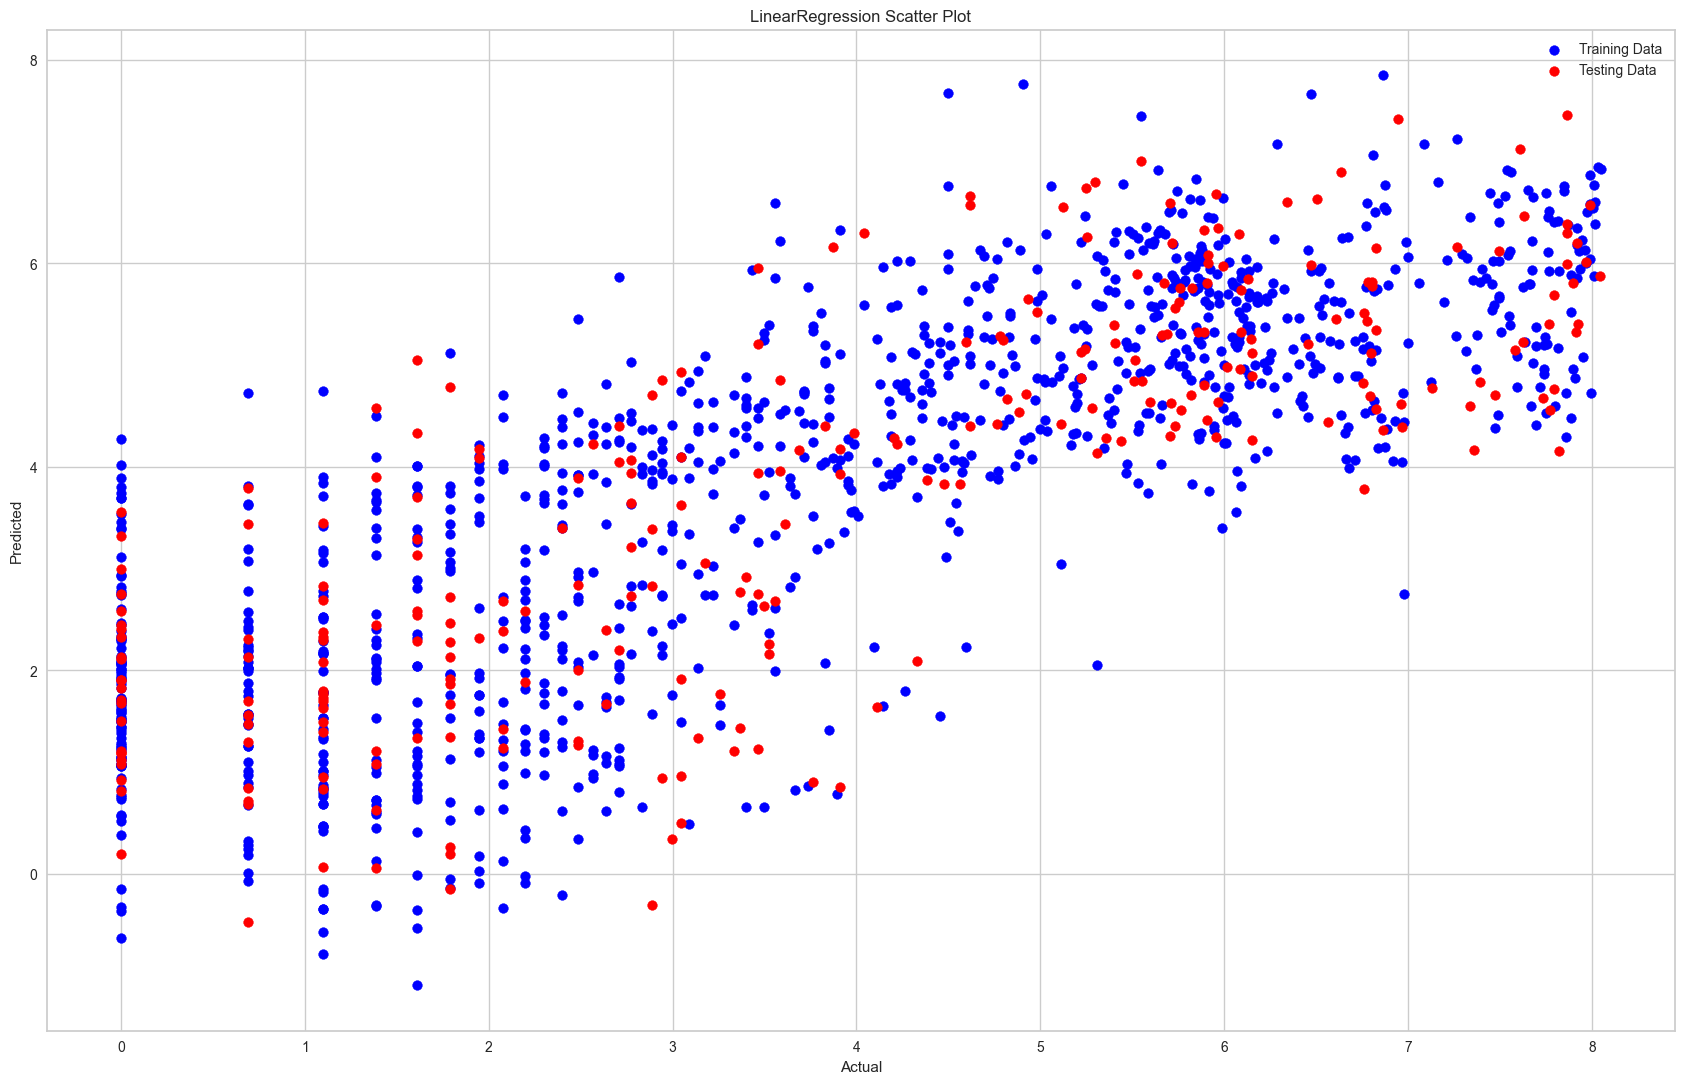

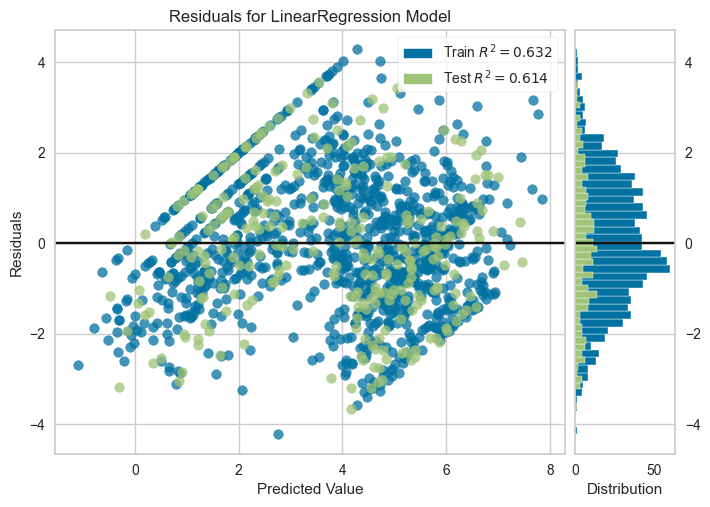

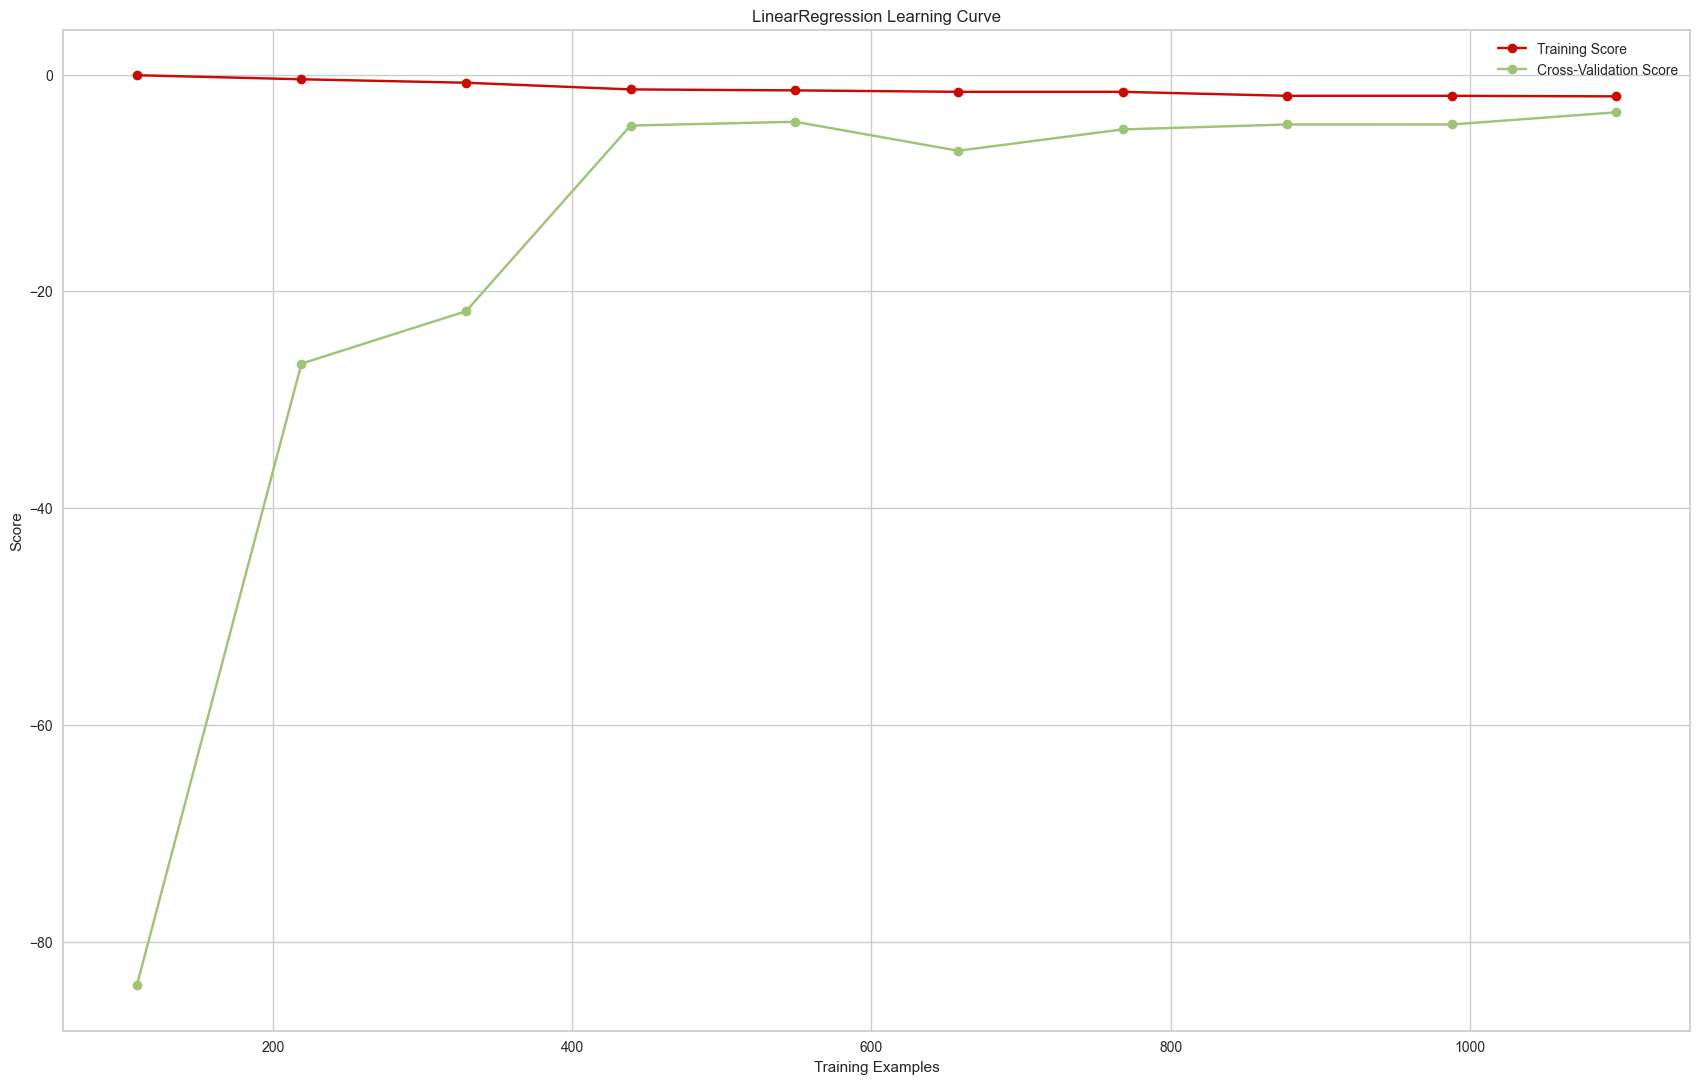

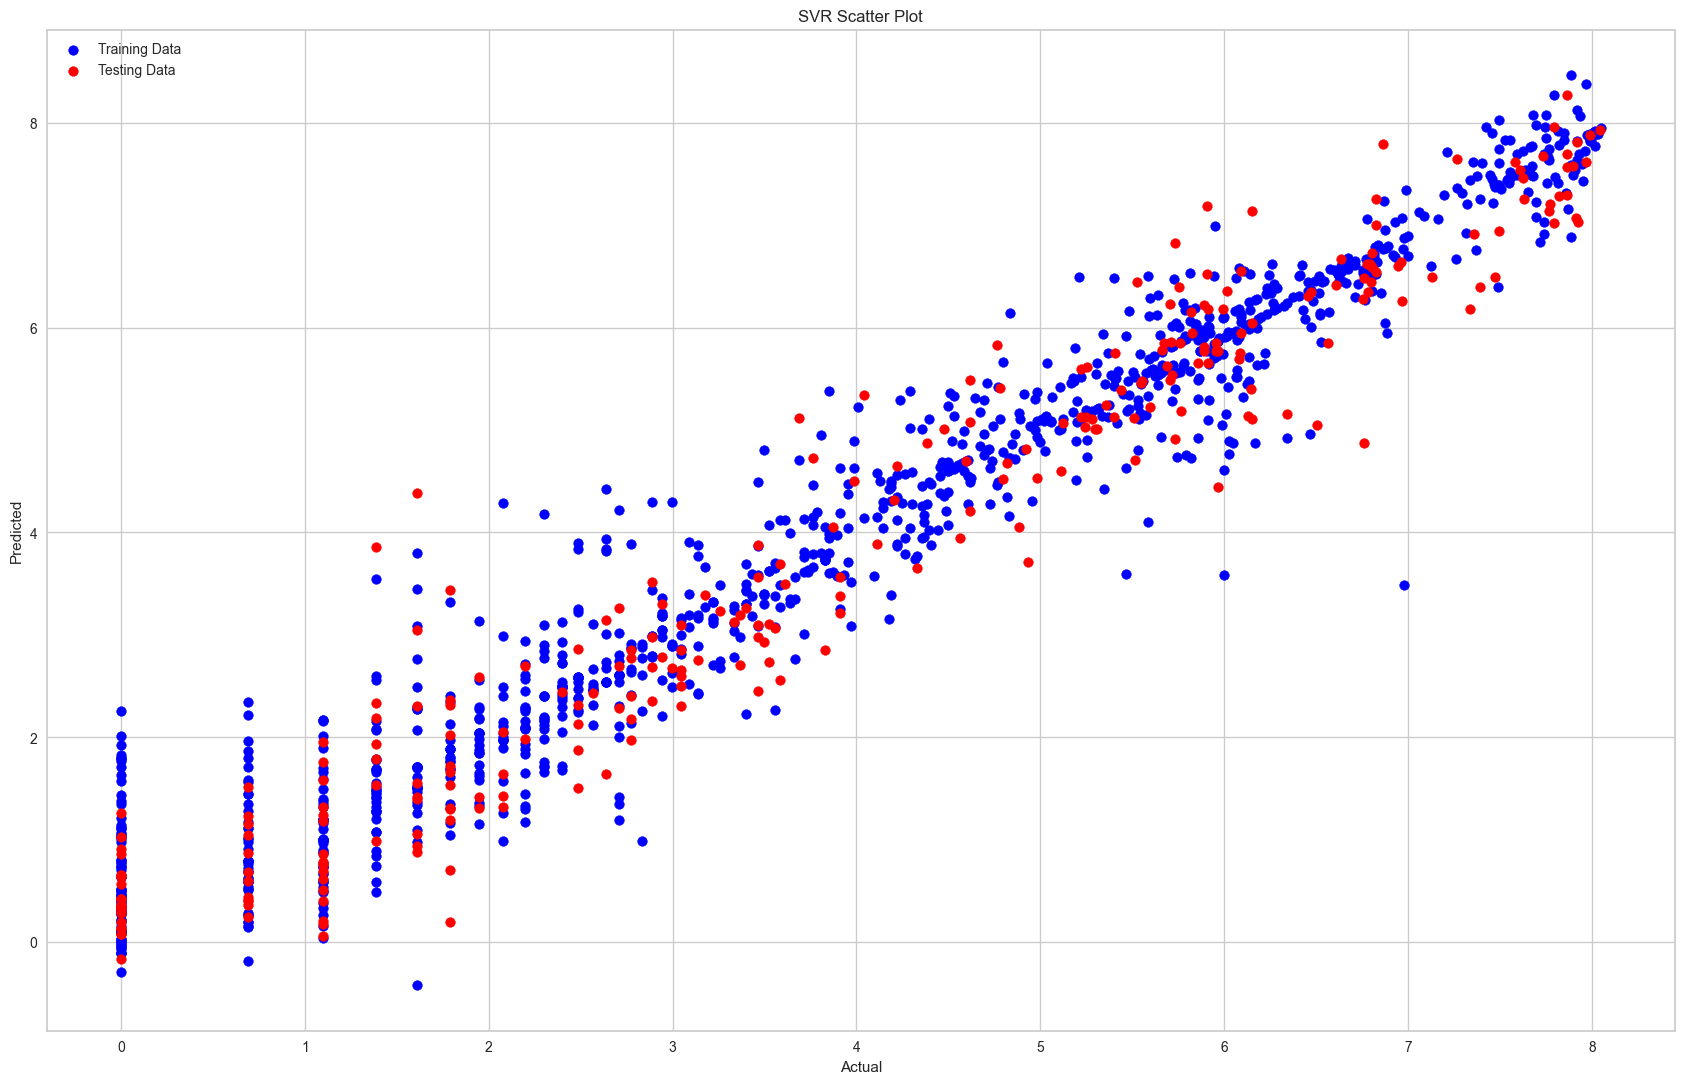

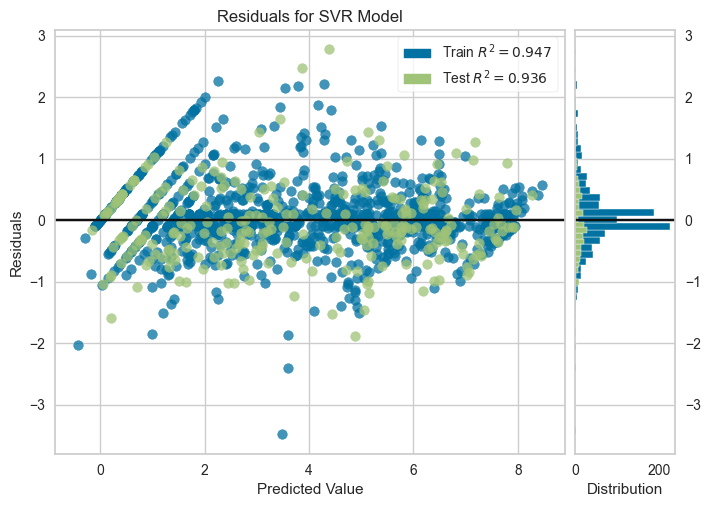

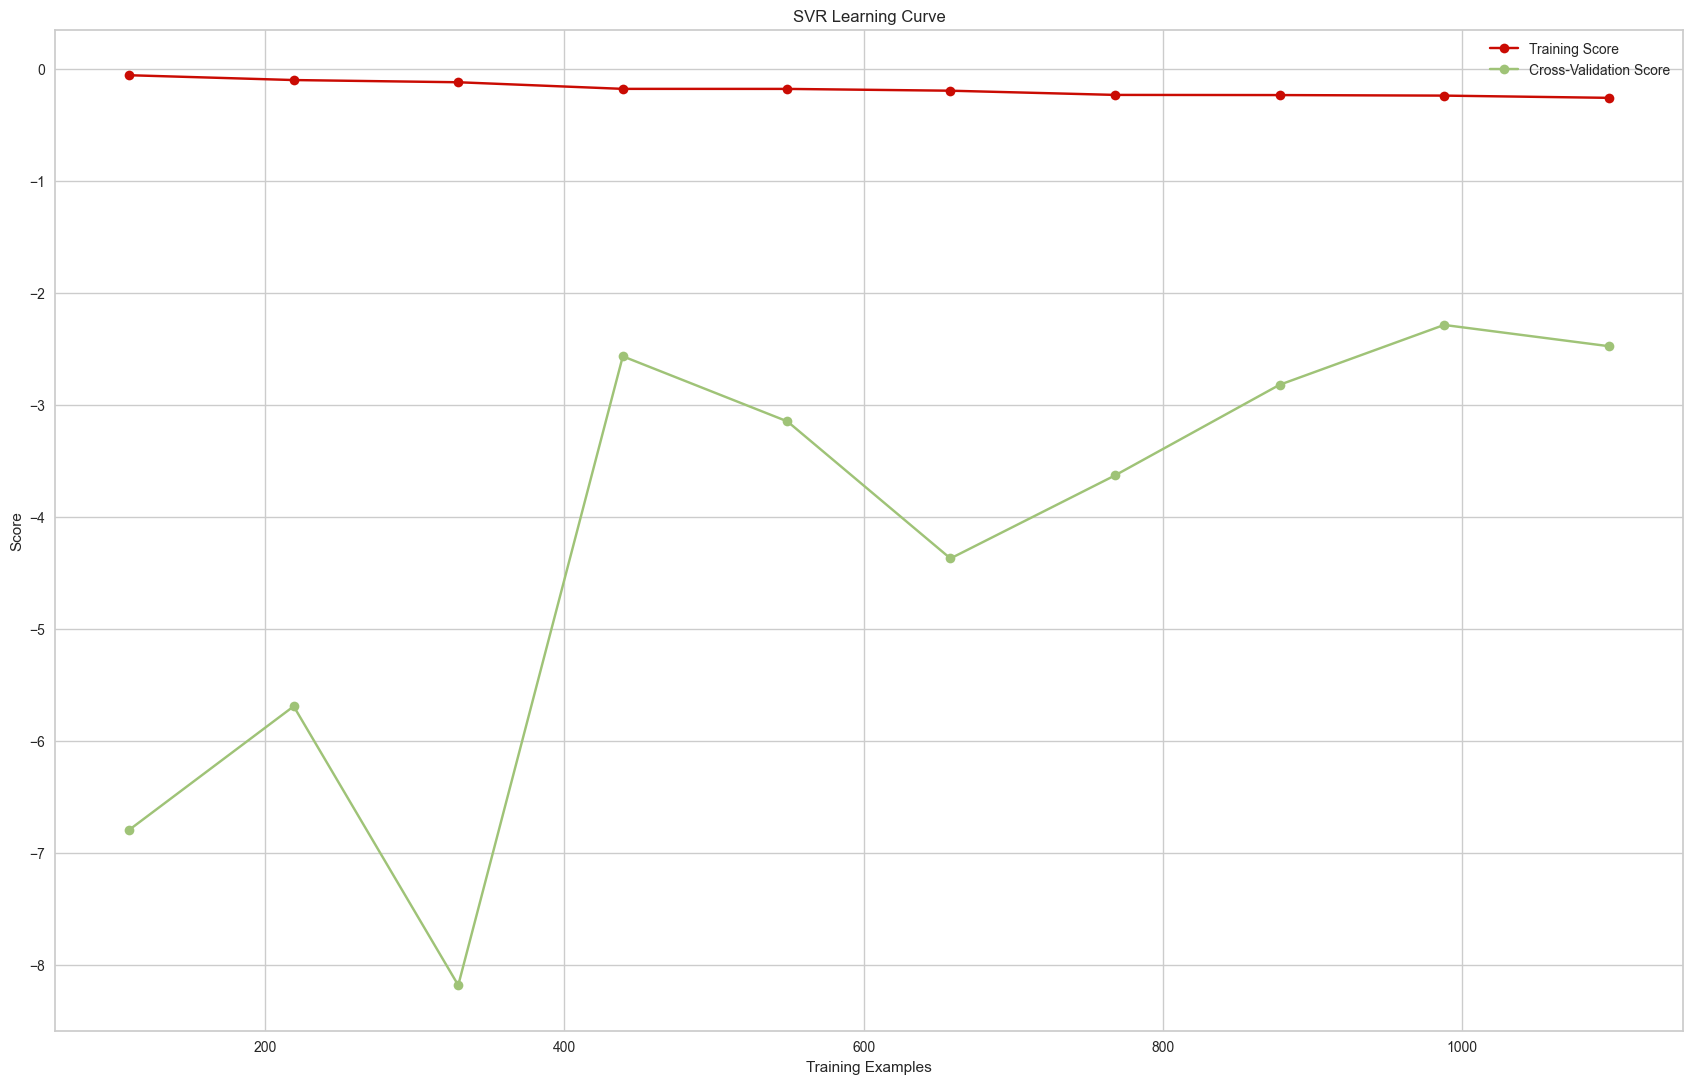

In [36]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from yellowbrick.regressor import ResidualsPlot

# Function to generate Scatter Plot
def generate_scatter_plot(model, X_train, X_test, y_train, y_test, name):
    plt.figure(figsize=(21, 13))
    plt.scatter(y_train, model.predict(X_train), color='blue', label='Training Data')
    plt.scatter(y_test, model.predict(X_test), color='red', label='Testing Data')
    plt.title(f'{name} Scatter Plot')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'{name}_scatter_plot.png')
    plt.show()

# Function to generate Residual Plot
def generate_residual_plot(model, X_train, X_test, y_train, y_test, name):
    visualizer = ResidualsPlot(model)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show(outpath=f'{name}_residual_plot.png')

# Function to generate Learning Curve
def generate_learning_curve(model, X, y, name):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(21, 13))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Score')
    plt.title(f'{name} Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'{name}_learning_curve.png')
    plt.show()

# Generate plots for each model
for name, model in models.items():
    if name in ['RandomForest', 'Lasso', 'LinearRegression', 'SVR']:
        if 'LSTM' in name or 'RNN' in name:
            # For Keras models, skip generating plots
            continue

        # Scatter Plot
        generate_scatter_plot(model, X_train, X_test, y_train, y_test, name)

        # Residual Plot
        generate_residual_plot(model, X_train, X_test, y_train, y_test, name)

        # Learning Curve
        generate_learning_curve(model, X_scaled, y, name)
